# Importation des Librairies et Données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,f1_score, recall_score, precision_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, fbeta_score

In [2]:
df = pd.read_csv('Untitled.csv',encoding='latin1')
df

,IDENSIN,Compagnie,Produit,NPolice,Version,NSinistre,ModedePaiement,Marque,Type,DateMEC,...,NbreAdverssaires,NbreVictimes,MontantRèglement,MontantRéserve,MontantRécupéré,MontantEngagé,GarageConventionné,VilleExpertise,RégionExpertise,FlagFraude
0,8428628,AtlantaSanad Assurances,motor,150.2020.00091655,AtlSnd_V1,151.2021.00000001,Avis de débit,BECANE,SPRING,2020,...,1,0,880,0,880,0,NaN,NaN,NaN,NaN
1,8004143,AtlantaSanad Assurances,auto,0161.3401.313349,AtlSnd_V1,2021.3400.000001,NaN,RENAULT,SR0W0H,2016,...,1,0,25866,0,26586,-720,false,"B4, Imm. B Résidence El Manar-",EL JADIDA,NaN
2,9045250,AtlantaSanad Assurances,,100.2020.00133901,AtlSnd_V1,101.2021.00000001,NaN,HYUNDAI I10,.,2010,...,1,0,2200,0,2200,0,false,"(EXAM) 10, AVENUE 2 MARS",CASABLANCA,NaN
3,8004148,AtlantaSanad Assurances,auto,0665.3401.300189,AtlSnd_V1,2021.3400.000002,NaN,PEUGEOT,VF3LB9HPA,2014,...,0,0,5500,0,6220,-720,false,"Résidence Dejla, Imm 18, Apt 4, Rue Dejla Bd Z...",CASABLANCA,NaN
4,8004223,AtlantaSanad Assurances,auto,0551.3401.380444,AtlSnd_V1,2021.3400.000003,NaN,BMW,..,2005,...,1,0,2300,0,3020,-720,false,"9, Bis Rue Abou Baker Seddik, 1er étage",TANGER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196961,15570962,AtlantaSanad Assurances,auto,0510.3401.399997,AtlSnd_V1,2022.3400.068385,NaN,.,.,2010,...,1,3,0,5000,0,5000,false,9 Cité Belle Vue  Beni Mellal,BENI MELLA,NaN
196962,15570945,AtlantaSanad Assurances,auto,0216.3401.312505,AtlSnd_V1,2022.3400.068384,NaN,NISSAN,FCAJ10,2018,...,1,1,0,40000,0,40000,false,Résidence Karam Eddine Ang Khalid Ben Oualid 2...,MARRAKECH,NaN
196963,15567788,AtlantaSanad Assurances,auto,0552.3401.388462,AtlSnd_V1,2022.3400.068379,NaN,DACIA,LOGAN,2022,...,1,1,0,35000,0,35000,false,"67 RUE DE DAMAS, BERRECHID",BERRECHID,NaN
196964,15567828,AtlantaSanad Assurances,auto,160.2019.00018293,AtlSnd_V1,2022.3100.007840,Virement,FORD,LXXGBUL,2000,...,1,4,0,648800,1100,647700,false,Résidence Karam Eddine Ang Khalid Ben Oualid 2...,MARRAKECH,NaN


#Exploration des données

In [3]:
#Examinons les dimensions du jeu de données
print('Le dataset contient', df.shape[0], 'lignes et', df.shape[1], 'colonnes')

Le dataset contient 196966 lignes et 54 colonnes


In [4]:
#liste des colonnes
print('Noms de colonnes :', list(df.columns))

Noms de colonnes : ['IDENSIN', 'Compagnie', 'Produit', 'NPolice', 'Version', 'NSinistre', 'ModedePaiement', 'Marque', 'Type', 'DateMEC', 'TypeMoteur', 'Cylindre', 'Puissance', 'Poids', 'NChassis', 'Matricule', 'TypeMatricule', 'Date1èreMEC', 'ValeuràNeuf', 'ValeurVénale', 'Réforme', 'Valeurépave', 'ValeurRésiduelle', 'ClasseVéhicule', 'POLICY.STATUS', 'ListeGaranties', 'NPolice_1', 'PrimeTotale', 'DateEffet', 'Echéance', 'ProchainTerme', 'DateSurv', 'DateDéclaration', 'HeureSurvenance', 'HeureDéclaration', 'NSinistre_1', 'ModeDéclaration', 'NbreJourITT', 'CausesDommage', 'ModePaiement', 'nbreVéhicule', 'LieuSinistre', 'Ville', 'PartResponsabilité', 'NbreAdverssaires', 'NbreVictimes', 'MontantRèglement', 'MontantRéserve', 'MontantRécupéré', 'MontantEngagé', 'GarageConventionné', 'VilleExpertise', 'RégionExpertise', 'FlagFraude']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196966 entries, 0 to 196965
Data columns (total 54 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IDENSIN             196966 non-null  object
 1   Compagnie           196966 non-null  object
 2   Produit             194804 non-null  object
 3   NPolice             196959 non-null  object
 4   Version             196911 non-null  object
 5   NSinistre           196962 non-null  object
 6   ModedePaiement      89811 non-null   object
 7   Marque              196904 non-null  object
 8   Type                189756 non-null  object
 9   DateMEC             196966 non-null  object
 10  TypeMoteur          196418 non-null  object
 11  Cylindre            27453 non-null   object
 12  Puissance           189052 non-null  object
 13  Poids               24412 non-null   object
 14  NChassis            32705 non-null   object
 15  Matricule           196855 non-null  object
 16  Ty

In [6]:
#les 5 premiéres lignes
df.head()

,IDENSIN,Compagnie,Produit,NPolice,Version,NSinistre,ModedePaiement,Marque,Type,DateMEC,...,NbreAdverssaires,NbreVictimes,MontantRèglement,MontantRéserve,MontantRécupéré,MontantEngagé,GarageConventionné,VilleExpertise,RégionExpertise,FlagFraude
0,8428628,AtlantaSanad Assurances,motor,150.2020.00091655,AtlSnd_V1,151.2021.00000001,Avis de débit,BECANE,SPRING,2020,...,1,0,880,0,880,0,NaN,NaN,NaN,NaN
1,8004143,AtlantaSanad Assurances,auto,0161.3401.313349,AtlSnd_V1,2021.3400.000001,NaN,RENAULT,SR0W0H,2016,...,1,0,25866,0,26586,-720,false,"B4, Imm. B Résidence El Manar-",EL JADIDA,NaN
2,9045250,AtlantaSanad Assurances,,100.2020.00133901,AtlSnd_V1,101.2021.00000001,NaN,HYUNDAI I10,.,2010,...,1,0,2200,0,2200,0,false,"(EXAM) 10, AVENUE 2 MARS",CASABLANCA,NaN
3,8004148,AtlantaSanad Assurances,auto,0665.3401.300189,AtlSnd_V1,2021.3400.000002,NaN,PEUGEOT,VF3LB9HPA,2014,...,0,0,5500,0,6220,-720,false,"Résidence Dejla, Imm 18, Apt 4, Rue Dejla Bd Z...",CASABLANCA,NaN
4,8004223,AtlantaSanad Assurances,auto,0551.3401.380444,AtlSnd_V1,2021.3400.000003,NaN,BMW,..,2005,...,1,0,2300,0,3020,-720,false,"9, Bis Rue Abou Baker Seddik, 1er étage",TANGER,NaN


In [7]:
#les 5 derniéres lignes
df.tail()

,IDENSIN,Compagnie,Produit,NPolice,Version,NSinistre,ModedePaiement,Marque,Type,DateMEC,...,NbreAdverssaires,NbreVictimes,MontantRèglement,MontantRéserve,MontantRécupéré,MontantEngagé,GarageConventionné,VilleExpertise,RégionExpertise,FlagFraude
196961,15570962,AtlantaSanad Assurances,auto,0510.3401.399997,AtlSnd_V1,2022.3400.068385,NaN,.,.,2010,...,1,3,0,5000,0,5000,false,9 Cité Belle Vue  Beni Mellal,BENI MELLA,NaN
196962,15570945,AtlantaSanad Assurances,auto,0216.3401.312505,AtlSnd_V1,2022.3400.068384,NaN,NISSAN,FCAJ10,2018,...,1,1,0,40000,0,40000,false,Résidence Karam Eddine Ang Khalid Ben Oualid 2...,MARRAKECH,NaN
196963,15567788,AtlantaSanad Assurances,auto,0552.3401.388462,AtlSnd_V1,2022.3400.068379,NaN,DACIA,LOGAN,2022,...,1,1,0,35000,0,35000,false,"67 RUE DE DAMAS, BERRECHID",BERRECHID,NaN
196964,15567828,AtlantaSanad Assurances,auto,160.2019.00018293,AtlSnd_V1,2022.3100.007840,Virement,FORD,LXXGBUL,2000,...,1,4,0,648800,1100,647700,false,Résidence Karam Eddine Ang Khalid Ben Oualid 2...,MARRAKECH,NaN
196965,15570504,AtlantaSanad Assurances,auto,160.2020.00027643,AtlSnd_V1,2021.3100.005819,Virement,RENAULT,.,2017,...,0,0,2086,0,2086,0,NaN,NaN,NaN,NaN


#Data Preprocessing

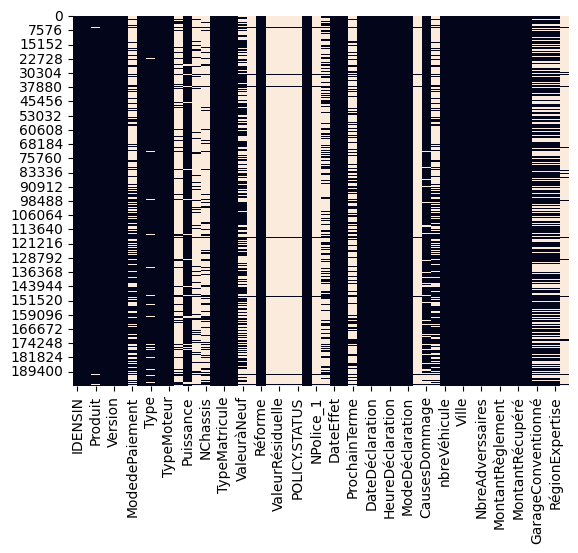

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## TREATING THE NULLS

In [9]:
#Supprimer la colunne des identifiant puisqu'elle est insignificatif
df.drop(columns=['PrimeTotale','ValeurVénale','Poids','Réforme','Valeurépave','ValeurRésiduelle','NbreJourITT','ValeuràNeuf','Type','ClasseVéhicule','NbreVictimes','POLICY.STATUS','NChassis','Cylindre','Compagnie', 'Version','NPolice_1','NSinistre_1','LieuSinistre','VilleExpertise','MontantRéserve','MontantRécupéré','MontantEngagé'],inplace=True)

In [10]:
# vérifier la duplication
df.duplicated().sum()

4140

In [11]:
# Drop duplicated rows and update the DataFrame
df.drop_duplicates(inplace=True)

In [12]:
# vérifier la duplication
df.duplicated().sum()

0

In [13]:
for col in df.columns:
    print('Feature "%s" has %i unique values'%(col, df[col].nunique()))

Feature "IDENSIN" has 190530 unique values
Feature "Produit" has 19 unique values
Feature "NPolice" has 133324 unique values
Feature "NSinistre" has 191688 unique values
Feature "ModedePaiement" has 527 unique values
Feature "Marque" has 4250 unique values
Feature "DateMEC" has 148 unique values
Feature "TypeMoteur" has 212 unique values
Feature "Puissance" has 79 unique values
Feature "Matricule" has 146069 unique values
Feature "TypeMatricule" has 96 unique values
Feature "Date1èreMEC" has 13159 unique values
Feature "ListeGaranties" has 6009 unique values
Feature "DateEffet" has 4070 unique values
Feature "Echéance" has 1335 unique values
Feature "ProchainTerme" has 1127 unique values
Feature "DateSurv" has 37594 unique values
Feature "DateDéclaration" has 154775 unique values
Feature "HeureSurvenance" has 1292 unique values
Feature "HeureDéclaration" has 1123 unique values
Feature "ModeDéclaration" has 88 unique values
Feature "CausesDommage" has 9 unique values
Feature "ModePaieme

In [14]:
df['Produit'].value_counts()

auto     179154
motor     11372
100         936
0           837
50          463
2021-        15
2015-         7
2018-         6
2019-         6
2017-         5
2013-         5
2020-         5
petro         4
2014-         3
              2
O             1
2003-         1
2008-         1
2022-         1
Name: Produit, dtype: int64

In [15]:
# Create a list of valid products
valid_products = ['auto', 'motor']

# Use the `isin` method to filter rows with 'Produit' column values in the valid_products list
df = df[df['Produit'].isin(valid_products)]

# Optional step: If you want to reset the index of the DataFrame after deleting rows, use the `reset_index` method.
df.reset_index(drop=True, inplace=True)

In [16]:
df['Produit'].value_counts()

auto     179154
motor     11372
Name: Produit, dtype: int64

In [17]:
df['ModedePaiement'].value_counts()

Avis de débit    35283
Virement         26292
Chèque           16324
Mise à Dispos     4250
Comp. CID Rée     1198
Comp. CID For       47
Saisie arrêt        33
Name: ModedePaiement, dtype: int64

In [18]:
df['ModedePaiement'].isnull().sum()

107099

In [19]:
df.loc[df['ModedePaiement'].isnull(), 'ModedePaiement'] = 'notmentioned'

<ipython-input-19-fb55f13b2d87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['ModedePaiement'].isnull(), 'ModedePaiement'] = 'notmentioned'


In [20]:
df['ModedePaiement'].value_counts()

notmentioned     107099
Avis de débit     35283
Virement          26292
Chèque            16324
Mise à Dispos      4250
Comp. CID Rée      1198
Comp. CID For        47
Saisie arrêt         33
Name: ModedePaiement, dtype: int64

In [21]:
df['ModedePaiement'].isnull().sum()

0

In [22]:
df['TypeMatricule'].value_counts()

regular    190143
governm       254
               57
22182-B         5
81775-A         4
31010-A         4
57470-A         4
61662-A         3
09116-A         3
07064-A         3
48622-A         3
44117-A         3
52689-B         2
30057-A         2
63794-A         2
20706-B         2
73346-B         2
28129-E         2
48648-A         1
51198-D         1
39021-A         1
49274-A         1
22431-A         1
18549-A         1
54452-A         1
20818-A         1
25887-A         1
65352-D         1
42109-A         1
24753-B         1
10786-A         1
08254-A         1
13971-A         1
47800-B         1
21039-A         1
01112-B         1
58328-A         1
68074-A         1
24882-A         1
00899-A         1
86180-H         1
98454-A         1
25279-A         1
12216-B         1
87798-B         1
24580-E         1
Name: TypeMatricule, dtype: int64

In [23]:
# Create a list of valid products
valid_products = ['regular','governm' ]

# Use the `isin` method to filter rows with 'Produit' column values in the valid_products list
df = df[df['TypeMatricule'].isin(valid_products)]

# Optional step: If you want to reset the index of the DataFrame after deleting rows, use the `reset_index` method.
df.reset_index(drop=True, inplace=True)

In [24]:
df['TypeMatricule'].value_counts()

regular    190143
governm       254
Name: TypeMatricule, dtype: int64

In [25]:
df['ListeGaranties'].value_counts()

RC|EveCat RC|                                                                                      8433
BG|CRM|DC|DR|IC|MA|RC|VL|Conducteur|Passagers|EveCat RC|EveCat Dom|                                5924
BG|DC|DR|IC|MA|RC|VL|Conducteur|Passagers|EveCat RC|EveCat Dom|                                    5840
BG|DR|IC|MA|RC|TC|VL|Conducteur|Passagers|EveCat RC|EveCat Dom|                                    4243
BG|CRM|DR|IC|MA|RC|TC|VL|Conducteur|Passagers|EveCat RC|EveCat Dom|                                3780
                                                                                                   ... 
BG|BM|B.Eff.Pers.|Rabais Covid 19|CRM|DR|Eq.AUDIO|IC|MA|RC|TC|VL|VP|VR|Conducteur|Passagers|Eve       1
BG|CRM|DC|DR|IC|EveCat RC|EveCat Dom|RC|MA|                                                           1
BG|DR|EveCat RC|EveCat Dom|IC|RC|                                                                     1
BG|CRM|EveCat RC|EveCat Dom|RC|DR|MA|Passagers|                 

In [26]:
# Step 1: Drop rows with missing values in the 'ListeGaranties' column.
df = df.dropna(subset=['ListeGaranties'])

# Step 2: Strip leading and trailing whitespaces from the 'ListeGaranties' column.
df['ListeGaranties'] = df['ListeGaranties'].str.strip()

# Step 3: Create a MultiLabelBinarizer object and fit_transform the 'ListeGaranties' column.
mlb = MultiLabelBinarizer()
guarantee_dummies = pd.DataFrame(mlb.fit_transform(df['ListeGaranties'].str.split('|')), columns=mlb.classes_, index=df.index)

# Step 4: Concatenate the binary columns with the original DataFrame.
df = pd.concat([df, guarantee_dummies], axis=1)

# Step 5: Drop the original 'ListeGaranties' column since it's no longer needed.
df.drop('ListeGaranties', axis=1, inplace=True)

In [27]:
df.drop('', axis=1, inplace=True)

In [28]:
df

,IDENSIN,Produit,NPolice,NSinistre,ModedePaiement,Marque,DateMEC,TypeMoteur,Puissance,Matricule,...,R,RC,RV,Rabais Covid 19,TC,V,V.Neuf,VL,VP,VR
0,8428628,motor,150.2020.00091655,151.2021.00000001,Avis de débit,BECANE,2020,petrol,49,LXYXCBL07L0267748,...,0,1,0,0,0,0,0,0,0,0
1,8004143,auto,0161.3401.313349,2021.3400.000001,notmentioned,RENAULT,2016,diesel,6,75634-H-06,...,0,1,0,0,0,0,0,1,0,0
2,8004148,auto,0665.3401.300189,2021.3400.000002,notmentioned,PEUGEOT,2014,diesel,6,36662-H-06,...,0,1,0,0,1,0,0,1,0,0
3,8004223,auto,0551.3401.380444,2021.3400.000003,notmentioned,BMW,2005,diesel,8,42040-A-26,...,0,1,0,0,0,0,0,1,0,0
4,9032447,auto,160.2020.00008901,161.2021.00000001,notmentioned,TOYOTA,1999,diesel,11,04410-A-70,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190392,15570962,auto,0510.3401.399997,2022.3400.068385,notmentioned,.,2010,petrol,10,.,...,0,1,0,0,1,0,0,1,0,0
190393,15570945,auto,0216.3401.312505,2022.3400.068384,notmentioned,NISSAN,2018,diesel,6,03413-B-26,...,0,1,0,0,0,0,0,1,0,0
190394,15567788,auto,0552.3401.388462,2022.3400.068379,notmentioned,DACIA,2022,diesel,6,WW978666,...,0,1,0,0,1,0,0,1,0,0
190395,15567828,auto,160.2019.00018293,2022.3100.007840,Virement,FORD,2000,diesel,10,02585-A-70,...,0,1,0,0,0,0,0,0,0,0


In [29]:
df['ModeDéclaration'].value_counts()

Assuré           136308
Intermédiaire     26994
Avocat             7448
Tribunal           7362
Compagnie Adv      7137
Autres             3291
Compagnie          1529
Name: ModeDéclaration, dtype: int64

In [30]:
df['FlagFraude'].value_counts()

        4729
O        891
CASA       3
RABA       1
BERR       1
BENI       1
Name: FlagFraude, dtype: int64

In [31]:
df['FlagFraude']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
190392    NaN
190393    NaN
190394    NaN
190395    NaN
190396    NaN
Name: FlagFraude, Length: 190069, dtype: object

In [32]:
# Step 1: Replace 'null' (NaN) with 'NoFraud' and 'O' with 'Fraud'.
df['FlagFraude'] = df['FlagFraude'].fillna('NoFraud').replace({'O': 'Fraud'})

# Step 2: Keep only the rows with 'NoFraud' or 'Fraud' values in 'FlagFraude' column.
df = df[df['FlagFraude'].isin(['NoFraud', 'Fraud'])]

# Step 3: Convert 'FlagFraude' column to categorical data type (optional).
df['FlagFraude'] = df['FlagFraude'].astype('category')

# Now the 'FlagFraude' column contains only two categories: 'NoFraud' and 'Fraud', with 'null' replaced as 'NoFraud' and 'O' replaced as 'Fraud'.
# Rows with other values in 'FlagFraude' have been deleted.



<ipython-input-32-e7933f7020eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FlagFraude'] = df['FlagFraude'].astype('category')


In [33]:
df['FlagFraude'].value_counts()

NoFraud    184443
Fraud         891
Name: FlagFraude, dtype: int64

In [34]:
df['FlagFraude']

0         NoFraud
1         NoFraud
2         NoFraud
3         NoFraud
4         NoFraud
           ...   
190392    NoFraud
190393    NoFraud
190394    NoFraud
190395    NoFraud
190396    NoFraud
Name: FlagFraude, Length: 185334, dtype: category
Categories (2, object): ['Fraud', 'NoFraud']

In [35]:
df['Matricule'].isnull().sum()

18

In [36]:
df.dropna(subset=['Matricule'], inplace=True)

<ipython-input-36-309b392d7daa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Matricule'], inplace=True)


In [37]:
df['TypeMoteur'].value_counts()

diesel    152074
petrol     33159
electr        82
Name: TypeMoteur, dtype: int64

In [38]:
df['TypeMoteur'].isnull().sum()

1

In [39]:
df.loc[df['TypeMoteur'].isnull()]['FlagFraude']

101896    NoFraud
Name: FlagFraude, dtype: category
Categories (2, object): ['Fraud', 'NoFraud']

In [40]:
df.dropna(subset=['TypeMoteur'], inplace=True)

<ipython-input-40-f38a7a7e4bfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['TypeMoteur'], inplace=True)


In [41]:
df['Puissance'].isnull().sum()

5029

In [42]:
df['Puissance'].fillna(0, inplace=True)

<ipython-input-42-8681f6a2a0df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Puissance'].fillna(0, inplace=True)


In [43]:
df['CausesDommage'].value_counts()

other                    149865
collision_head_on          9452
collision_crossroad        3333
collision_lane_change      2001
collision_pedestrian       1327
Name: CausesDommage, dtype: int64

In [44]:
df['CausesDommage'].isnull().sum()

19337

In [45]:
df['CausesDommage'] = df['CausesDommage'].fillna('notmentioned')

<ipython-input-45-a61ffe2a1344>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CausesDommage'] = df['CausesDommage'].fillna('notmentioned')


In [46]:
df['ModePaiement'].isnull().sum()

104338

In [47]:
df['ModePaiement'] = df['ModePaiement'].fillna('notmentioned')

<ipython-input-47-be3e5dc6e91f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ModePaiement'] = df['ModePaiement'].fillna('notmentioned')


In [48]:
df['GarageConventionné'].value_counts()

false    119649
true        149
Name: GarageConventionné, dtype: int64

In [49]:
df['GarageConventionné'].isnull().sum()

65517

In [50]:
df['GarageConventionné'] = df['GarageConventionné'].fillna('false')

<ipython-input-50-5d360845792d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageConventionné'] = df['GarageConventionné'].fillna('false')


In [51]:
df['GarageConventionné'].value_counts()

false    185166
true        149
Name: GarageConventionné, dtype: int64

In [52]:
df['RégionExpertise'].value_counts()

CASABLANCA    42015
RABAT         19789
AGADIR        10371
FES            7912
MARRAKECH      7273
TANGER         7188
MEKNES         4359
TETOUAN        3379
EL JADIDA      2681
OUJDA          2564
MOHAMMADIA     2075
SALE           1608
BENI MELLA     1574
KENITRA        1249
SAFI           1159
LAAYOUNE       1001
BERRECHID       758
SIDI KACEM      631
KHOURIBGA       568
SETTAT          375
TAZA            246
BERKANE         167
KHEMISSET       132
DAKHLA          115
OUARZAZATE      105
FKIH BEN S       88
GUERCIF          79
INEZGANE         72
TIZNIT           61
SEFROU           56
TEMARA           36
NADOR            34
MECHRA BEL       34
LARACHE          24
KSAR EL KE        9
AL HOCEIMA        8
.                 3
Name: RégionExpertise, dtype: int64

In [53]:
df['RégionExpertise'].isnull().sum()

65517

In [54]:
df['RégionExpertise'] = df['RégionExpertise'].fillna('notmentioned')
df['RégionExpertise'] = df['RégionExpertise'].replace('.', 'notmentioned')

<ipython-input-54-e1f97703894c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RégionExpertise'] = df['RégionExpertise'].fillna('notmentioned')
<ipython-input-54-e1f97703894c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RégionExpertise'] = df['RégionExpertise'].replace('.', 'notmentioned')


In [55]:
df['RégionExpertise'].value_counts()

notmentioned    65520
CASABLANCA      42015
RABAT           19789
AGADIR          10371
FES              7912
MARRAKECH        7273
TANGER           7188
MEKNES           4359
TETOUAN          3379
EL JADIDA        2681
OUJDA            2564
MOHAMMADIA       2075
SALE             1608
BENI MELLA       1574
KENITRA          1249
SAFI             1159
LAAYOUNE         1001
BERRECHID         758
SIDI KACEM        631
KHOURIBGA         568
SETTAT            375
TAZA              246
BERKANE           167
KHEMISSET         132
DAKHLA            115
OUARZAZATE        105
FKIH BEN S         88
GUERCIF            79
INEZGANE           72
TIZNIT             61
SEFROU             56
TEMARA             36
NADOR              34
MECHRA BEL         34
LARACHE            24
KSAR EL KE          9
AL HOCEIMA          8
Name: RégionExpertise, dtype: int64

In [56]:
date_mec_counts=df['DateMEC'].value_counts()
date_mec_counts_str = date_mec_counts.to_string()

print(date_mec_counts_str)

2021    16160
2019    15129
2018    13990
2020    13791
2017    12382
2016    10741
2015     8895
2014     7951
2012     7417
2013     7176
2008     6373
2011     6337
2010     6156
2009     5844
2007     5177
2022     4850
2006     4126
2005     3271
2004     2727
2003     2513
2002     2329
2000     2041
2001     2000
1999     1806
1998     1381
1994     1163
1997     1150
1992     1101
1995     1078
1993     1028
1991      957
1996      901
1990      835
1988      778
1987      765
1989      765
1986      700
1985      568
1984      427
          368
2023      360
19        260
1983      195
20        177
1982      175
18        174
1980      149
17        131
1981      120
1979       74
1978       59
16         51
1977       38
1976       16
1975       11
1974        8
1970        8
1972        8
1           7
1968        6
1973        6
11          5
200         4
1920        4
10          4
1900        4
1971        3
206         3
212         3
199         3
213         3
13    

In [57]:
# Check for empty strings (containing only whitespace characters) in the 'DateMEC' column
empty_strings = df['DateMEC'].apply(lambda x: isinstance(x, str) and x.isspace())

# Count the occurrences of empty strings
empty_string_count = empty_strings.sum()

# Print the count of empty strings
print(empty_string_count)

368


In [58]:
df['DateMEC'] = df['DateMEC'].str.replace(" ", "000")

<ipython-input-58-7435cc5da4f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateMEC'] = df['DateMEC'].str.replace(" ", "000")


In [59]:
print(df['DateMEC'].isnull().sum())

0


In [60]:
# Step 1: Use value_counts() to get the count of each unique value in the 'DateMEC' column.
date_mec_counts = df['DateMEC'].value_counts()

# Step 2: Convert the result to a string to display all the unique values without truncation.
date_mec_counts_str = date_mec_counts.to_string()

print(date_mec_counts_str)

2021    16160
2019    15129
2018    13990
2020    13791
2017    12382
2016    10741
2015     8895
2014     7951
2012     7417
2013     7176
2008     6373
2011     6337
2010     6156
2009     5844
2007     5177
2022     4850
2006     4126
2005     3271
2004     2727
2003     2513
2002     2329
2000     2041
2001     2000
1999     1806
1998     1381
1994     1163
1997     1150
1992     1101
1995     1078
1993     1028
1991      957
1996      901
1990      835
1988      778
1987      765
1989      765
1986      700
1985      568
1984      427
000       368
2023      360
19        260
1983      195
20        177
1982      175
18        174
1980      149
17        131
1981      120
1979       74
1978       59
16         51
1977       38
1976       16
1975       11
1974        8
1970        8
1972        8
1           7
1968        6
1973        6
11          5
200         4
1920        4
10          4
1900        4
1971        3
206         3
212         3
199         3
213         3
13    

In [61]:
df['DateMEC'] = df['DateMEC'].astype(str)
df.loc[(df['DateMEC'].str.len() == 1) , 'DateMEC'] = '200' + df['DateMEC']
df.loc[df['DateMEC'].str.len() == 2, 'DateMEC'] = '20' + df['DateMEC']
# Step 2: Replace specific values.
df['DateMEC'] = df['DateMEC'].replace(['206','200', '211', '216', '205', '207', '217', '214', '212', '213', '210', '202', '208', '204', '201', '203', '214', '215', '217'], ['2006','2000', '2011', '2016', '2005', '2007', '2017', '2014', '2012', '2013', '2010', '2002', '2008', '2004', '2001', '2003', '2014', '2015', '2017'])
df['DateMEC'] = df['DateMEC'].replace(['986','182','199','197','987','195','999'],['1986','1982','1999','1997', '1987','1995','1999'])

<ipython-input-61-1972ae6dcc17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateMEC'] = df['DateMEC'].astype(str)
<ipython-input-61-1972ae6dcc17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateMEC'] = df['DateMEC'].replace(['206','200', '211', '216', '205', '207', '217', '214', '212', '213', '210', '202', '208', '204', '201', '203', '214', '215', '217'], ['2006','2000', '2011', '2016', '2005', '2007', '2017', '2014', '2012', '2013', '2010', '2002', '2008', '2004', '2001', '2003', '2014', 

In [62]:
# Step 1: Use value_counts() to get the count of each unique value in the 'DateMEC' column.
date_mec_counts = df['DateMEC'].value_counts()

# Step 2: Convert the result to a string to display all the unique values without truncation.
date_mec_counts_str = date_mec_counts.to_string()

print(date_mec_counts_str)

2021    16162
2019    15389
2018    14164
2020    13968
2017    12514
2016    10793
2015     8896
2014     7954
2012     7421
2013     7182
2008     6376
2011     6343
2010     6163
2009     5846
2007     5180
2022     4851
2006     4130
2005     3272
2004     2729
2003     2515
2002     2332
2000     2045
2001     2009
1999     1810
1998     1381
1994     1163
1997     1153
1992     1101
1995     1079
1993     1028
1991      957
1996      901
1990      835
1988      778
1987      766
1989      765
1986      701
1985      568
1984      427
000       368
2023      361
1983      195
1982      176
1980      149
1981      120
1979       74
1978       59
1977       38
1976       16
1975       11
1974        8
1970        8
1972        8
1968        6
1973        6
1920        4
1900        4
1969        3
1971        3
1967        2
1950        2
1962        2
2082        2
2029        2
1015        2
1011        1
2066        1
7430        1
1010        1
1194        1
2028        1
2121  

In [63]:
# Convert 'DateMEC' column back to int64 type
df['DateMEC'] = df['DateMEC'].astype(int)

# Filter rows with values between 1900 and 2023 or '000'
df = df[(df['DateMEC'].between(1900, 2023)) | (df['DateMEC'] == 0)]

<ipython-input-63-8883bb5c4e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateMEC'] = df['DateMEC'].astype(int)


In [64]:
df['DateMEC'] = pd.to_datetime(df['DateMEC'], format='%Y', errors='coerce')

<ipython-input-64-1cebf730f4c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateMEC'] = pd.to_datetime(df['DateMEC'], format='%Y', errors='coerce')


In [65]:
df['DateMEC']

0        2020-01-01
1        2016-01-01
2        2014-01-01
3        2005-01-01
4        1999-01-01
            ...    
190392   2010-01-01
190393   2018-01-01
190394   2022-01-01
190395   2000-01-01
190396   2017-01-01
Name: DateMEC, Length: 185280, dtype: datetime64[ns]

In [66]:
date_mec_counts=df['Date1èreMEC'].value_counts()
date_mec_counts_str = date_mec_counts.to_string()

print(date_mec_counts_str)

2021-01-04    284
2018-01-02    274
2020-01-02    243
2019-01-01    234
2019-01-02    227
2017-01-02    205
2019-01-03    187
2020-01-03    185
2019-06-28    170
2018-01-03    149
2015-01-01    149
2014-01-02    145
2010-01-01    143
2020-01-01    143
2021-01-06    142
2021-01-25    141
1987-01-01    139
2015-01-02    138
2022-01-03    136
1985-01-01    133
2018-01-04    131
2018-04-30    131
2018-04-26    130
2013-01-02    128
1986-01-01    126
2017-01-03    126
2012-01-02    123
2019-01-31    122
2019-01-04    121
2020-03-03    121
2019-11-28    120
2020-01-07    119
2020-01-09    118
2021-02-26    118
2018-04-27    117
2021-01-05    117
2016-01-04    115
2000-01-01    115
2021-02-24    113
2021-01-15    111
2019-10-22    111
2019-01-07    110
2020-01-06    110
2019-11-26    110
2018-01-05    109
2016-01-05    108
1988-01-01    108
2020-01-24    105
2016-05-27    103
2018-01-10    102
2020-07-16    101
2021-02-19    101
2018-01-01    101
2020-07-28    101
2021-01-08    101
2020-10-26

In [67]:
print(df['Date1èreMEC'].isnull().sum())
# Check for empty strings (containing only whitespace characters) in the 'DateMEC' column
empty_strings = df['Date1èreMEC'].apply(lambda x: isinstance(x, str) and x.isspace())

# Count the occurrences of empty strings
empty_string_count = empty_strings.sum()

# Print the count of empty strings
print(empty_string_count)

368
0


In [68]:
df['Date1èreMEC'] = df['Date1èreMEC'].str.replace(" ", "01/01/2023")

In [69]:
df['Date1èreMEC'] = df['Date1èreMEC'].str.replace("0013-05-28","2013-05-28")
df['Date1èreMEC'] = df['Date1èreMEC'].str.replace("0019-02-18","2019-02-18")
print(df.iloc[1141]['Date1èreMEC'])

2013-05-28


In [70]:
def fix_date_format(date_str):
    if pd.notnull(date_str):
        parts = date_str.split('/')
        if len(parts[0]) == 2:  # Assuming two digits represent years without century information
            year = int(parts[0])
            if year < 24:  # For years 00-29, assume 2000s (e.g., '03/05/28' -> '2003/05/28')
                year = 2000 + year
            else:  # For years 30-99, assume 1900s (e.g., '98/02/18' -> '1998/02/18')
                year = 1900 + year
            parts[0] = str(year)

        # Check if the resulting date is valid
        try:
            pd.to_datetime('/'.join(parts), format='%Y/%m/%d')
            return '/'.join(parts)
        except ValueError:
            return pd.NaT  # Return NaT for any invalid date strings
    else:
        return date_str

df['Date1èreMEC'] = df['Date1èreMEC'].apply(fix_date_format)
df['Date1èreMEC'] = pd.to_datetime(df['Date1èreMEC'], format='%Y/%m/%d')


In [71]:
df['Date1èreMEC']

0        2020-07-10
1        2016-05-25
2        2014-08-25
3        2005-10-11
4        1999-07-08
            ...    
190392   2010-01-01
190393   2018-11-05
190394   2022-03-25
190395   2000-01-01
190396   2017-03-03
Name: Date1èreMEC, Length: 185280, dtype: datetime64[ns]

In [72]:
df['DateEffet'] = pd.to_datetime(df['DateEffet'], format='%d/%m/%Y')
df['DateEffet']

0        2020-07-10
1        2019-05-03
2        2020-08-13
3        2020-12-30
4        2020-05-22
            ...    
190392   1900-01-01
190393   2018-11-05
190394   2022-03-25
190395   2019-05-16
190396   2020-12-17
Name: DateEffet, Length: 185280, dtype: datetime64[ns]

In [73]:
df['Echéance'] = pd.to_datetime(df['Echéance'], format='%d/%m/%Y %H:%M:%S')
df['Echéance']

0        2021-01-09 23:59:00
1        2021-05-03 23:59:00
2        2021-08-12 23:59:00
3        2021-12-29 23:59:00
4        2021-02-21 23:59:00
                 ...        
190392   2023-12-31 23:59:00
190393   2023-11-04 23:59:00
190394   2022-12-31 23:59:00
190395   2023-05-15 23:59:00
190396   2021-12-16 23:59:00
Name: Echéance, Length: 185280, dtype: datetime64[ns]

In [74]:
df['ProchainTerme'] = pd.to_datetime(df['ProchainTerme'], format='%d/%m/%Y %H:%M:%S')
df['ProchainTerme'].fillna(pd.NaT, inplace=True)
df['ProchainTerme']

0               NaT
1               NaT
2               NaT
3               NaT
4        2021-02-22
            ...    
190392          NaT
190393          NaT
190394   2023-01-01
190395          NaT
190396   2021-12-17
Name: ProchainTerme, Length: 185280, dtype: datetime64[ns]

In [75]:
df['DateSurv'] = pd.to_datetime(df['DateSurv'], format='%d/%m/%Y %H:%M:%S')
df['DateDéclaration'] = pd.to_datetime(df['DateDéclaration'], format='%d/%m/%Y %H:%M:%S')

In [76]:
df['DateDéclaration']

0        2021-01-01 00:00:00
1        2021-01-01 17:01:00
2        2021-01-02 09:38:13
3        2021-01-02 09:54:11
4        2021-01-02 10:13:56
                 ...        
190392   2023-07-17 00:00:00
190393   2023-07-17 00:00:00
190394   2023-07-17 00:00:00
190395   2023-07-17 00:00:00
190396   2023-07-17 00:00:00
Name: DateDéclaration, Length: 185280, dtype: datetime64[ns]

In [77]:
df['HeureSurvenance']

0         00:00
1         00:00
2         00:00
3         00:00
4         10:12
          ...  
190392    00:00
190393    00:00
190394    00:00
190395    00:00
190396    00:00
Name: HeureSurvenance, Length: 185280, dtype: object

In [78]:
df['HeureSurvenance'] = pd.to_datetime(df['HeureSurvenance'], format='%H:%M')
df['HeureDéclaration'] = pd.to_datetime(df['HeureSurvenance'], format='%H:%M')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185280 entries, 0 to 190396
Data columns (total 75 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   IDENSIN               185280 non-null  object        
 1   Produit               185280 non-null  object        
 2   NPolice               185280 non-null  object        
 3   NSinistre             185280 non-null  object        
 4   ModedePaiement        185280 non-null  object        
 5   Marque                185280 non-null  object        
 6   DateMEC               184912 non-null  datetime64[ns]
 7   TypeMoteur            185280 non-null  object        
 8   Puissance             185280 non-null  object        
 9   Matricule             185280 non-null  object        
 10  TypeMatricule         185280 non-null  object        
 11  Date1èreMEC           184058 non-null  datetime64[ns]
 12  DateEffet             185280 non-null  datetime64[ns]
 13 

In [80]:
df['ModePaiement'].isnull().sum()

0

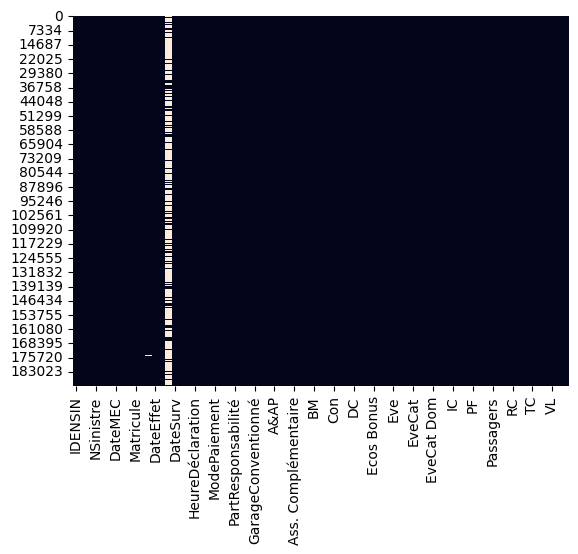

In [81]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [82]:
 # Step 1: Define a dictionary to specify the desired data type for each column.
# The keys in the dictionary are the column names, and the values are the desired data types.
data_types = {
    'IDENSIN': int,
    'Produit': str,
    'NPolice': str,
    'NSinistre': str,
    'ModedePaiement': str,
    'Marque': str,
    'DateMEC': 'datetime64',
    'TypeMoteur': str,
    'Puissance': int,
    'Matricule': str,
    'TypeMatricule': str,
    'Date1èreMEC': 'datetime64',
    'DateEffet': 'datetime64',
    'Echéance': 'datetime64',
    'ProchainTerme': 'datetime64',
    'DateSurv': 'datetime64',
    'DateDéclaration': 'datetime64',
    'HeureSurvenance': 'datetime64',
    'HeureDéclaration': 'datetime64',
    'ModeDéclaration': str,
    'CausesDommage': str,
    'ModePaiement': str,
    'nbreVéhicule': int,
    'Ville': str,
    'PartResponsabilité': str,
    'NbreAdverssaires': int,
    'MontantRèglement': float,
    'GarageConventionné': str,
    'RégionExpertise': str,
    'FlagFraude': str,
    'A&AP': int,
    'Acc. Amén': int,
    'Appareils électrique': int,
    'Ass. Complémentaire': int,
    'B.Eff.Pers.': int,
    'BG': int,
    'BM': int,
    'BN': int,
    'CRM': int,
    'Con': int,
    'Condu': int,
    'Conducteur': int,
    'DC': int,
    'DR': int,
    'E': int,
    'Ecos Bonus': int,
    'Eq.AUDIO': int,
    'Ev': int,
    'Eve': int,
    'EveC': int,
    'EveCa': int,
    'EveCat': int,
    'EveCat D': int,
    'EveCat Do': int,
    'EveCat Dom': int,
    'EveCat R': int,
    'EveCat RC': int,
    'IC': int,
    'Inond.': int,
    'MA': int,
    'PF': int,
    'PM': int,
    'Passager': int,
    'Passagers': int,
    'Pertes batteries': int,
    'R': int,
    'RC': int,
    'RV': int,
    'Rabais Covid 19': int,
    'TC': int,
    'V': int,
    'V.Neuf': int,
    'VL': int,
    'VP': int,
    'VR': int
}

# Step 2: Use the astype() method to change the data types for each column.
df = df.astype(data_types)

# Now the data types for each column in the DataFrame 'df' have been changed according to the specified dictionary.

# You can continue to use the DataFrame 'df' with the updated data types.


<ipython-input-82-78821998fec8>:82: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df = df.astype(data_types)


In [83]:
N = 20
#supprimer toutes les lignes de df qui ont au moins un NaN sauf celles qui ont au moins N valeurs non NaN
df= df.dropna(thresh=len(df.columns) - N)

In [84]:
colors = ['gold', 'mediumturquoise']
labels = ['notFraud','Fraud']
values = df['FlagFraude'].value_counts()/df['FlagFraude'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="churn prediction",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

# GRAPHICAL ANALYSIS


In [85]:
selected_columns = ['Produit','ModedePaiement',
                    'TypeMoteur', 'TypeMatricule', 'ModeDéclaration',
                    'CausesDommage', 'ModePaiement', 'PartResponsabilité',
                    'GarageConventionné', 'RégionExpertise', 'FlagFraude', 'CRM', 'Conducteur']

# Use the 'loc' method to select only the specified columns with data types 'int' and 'str'
selected_data = df.loc[:, selected_columns]

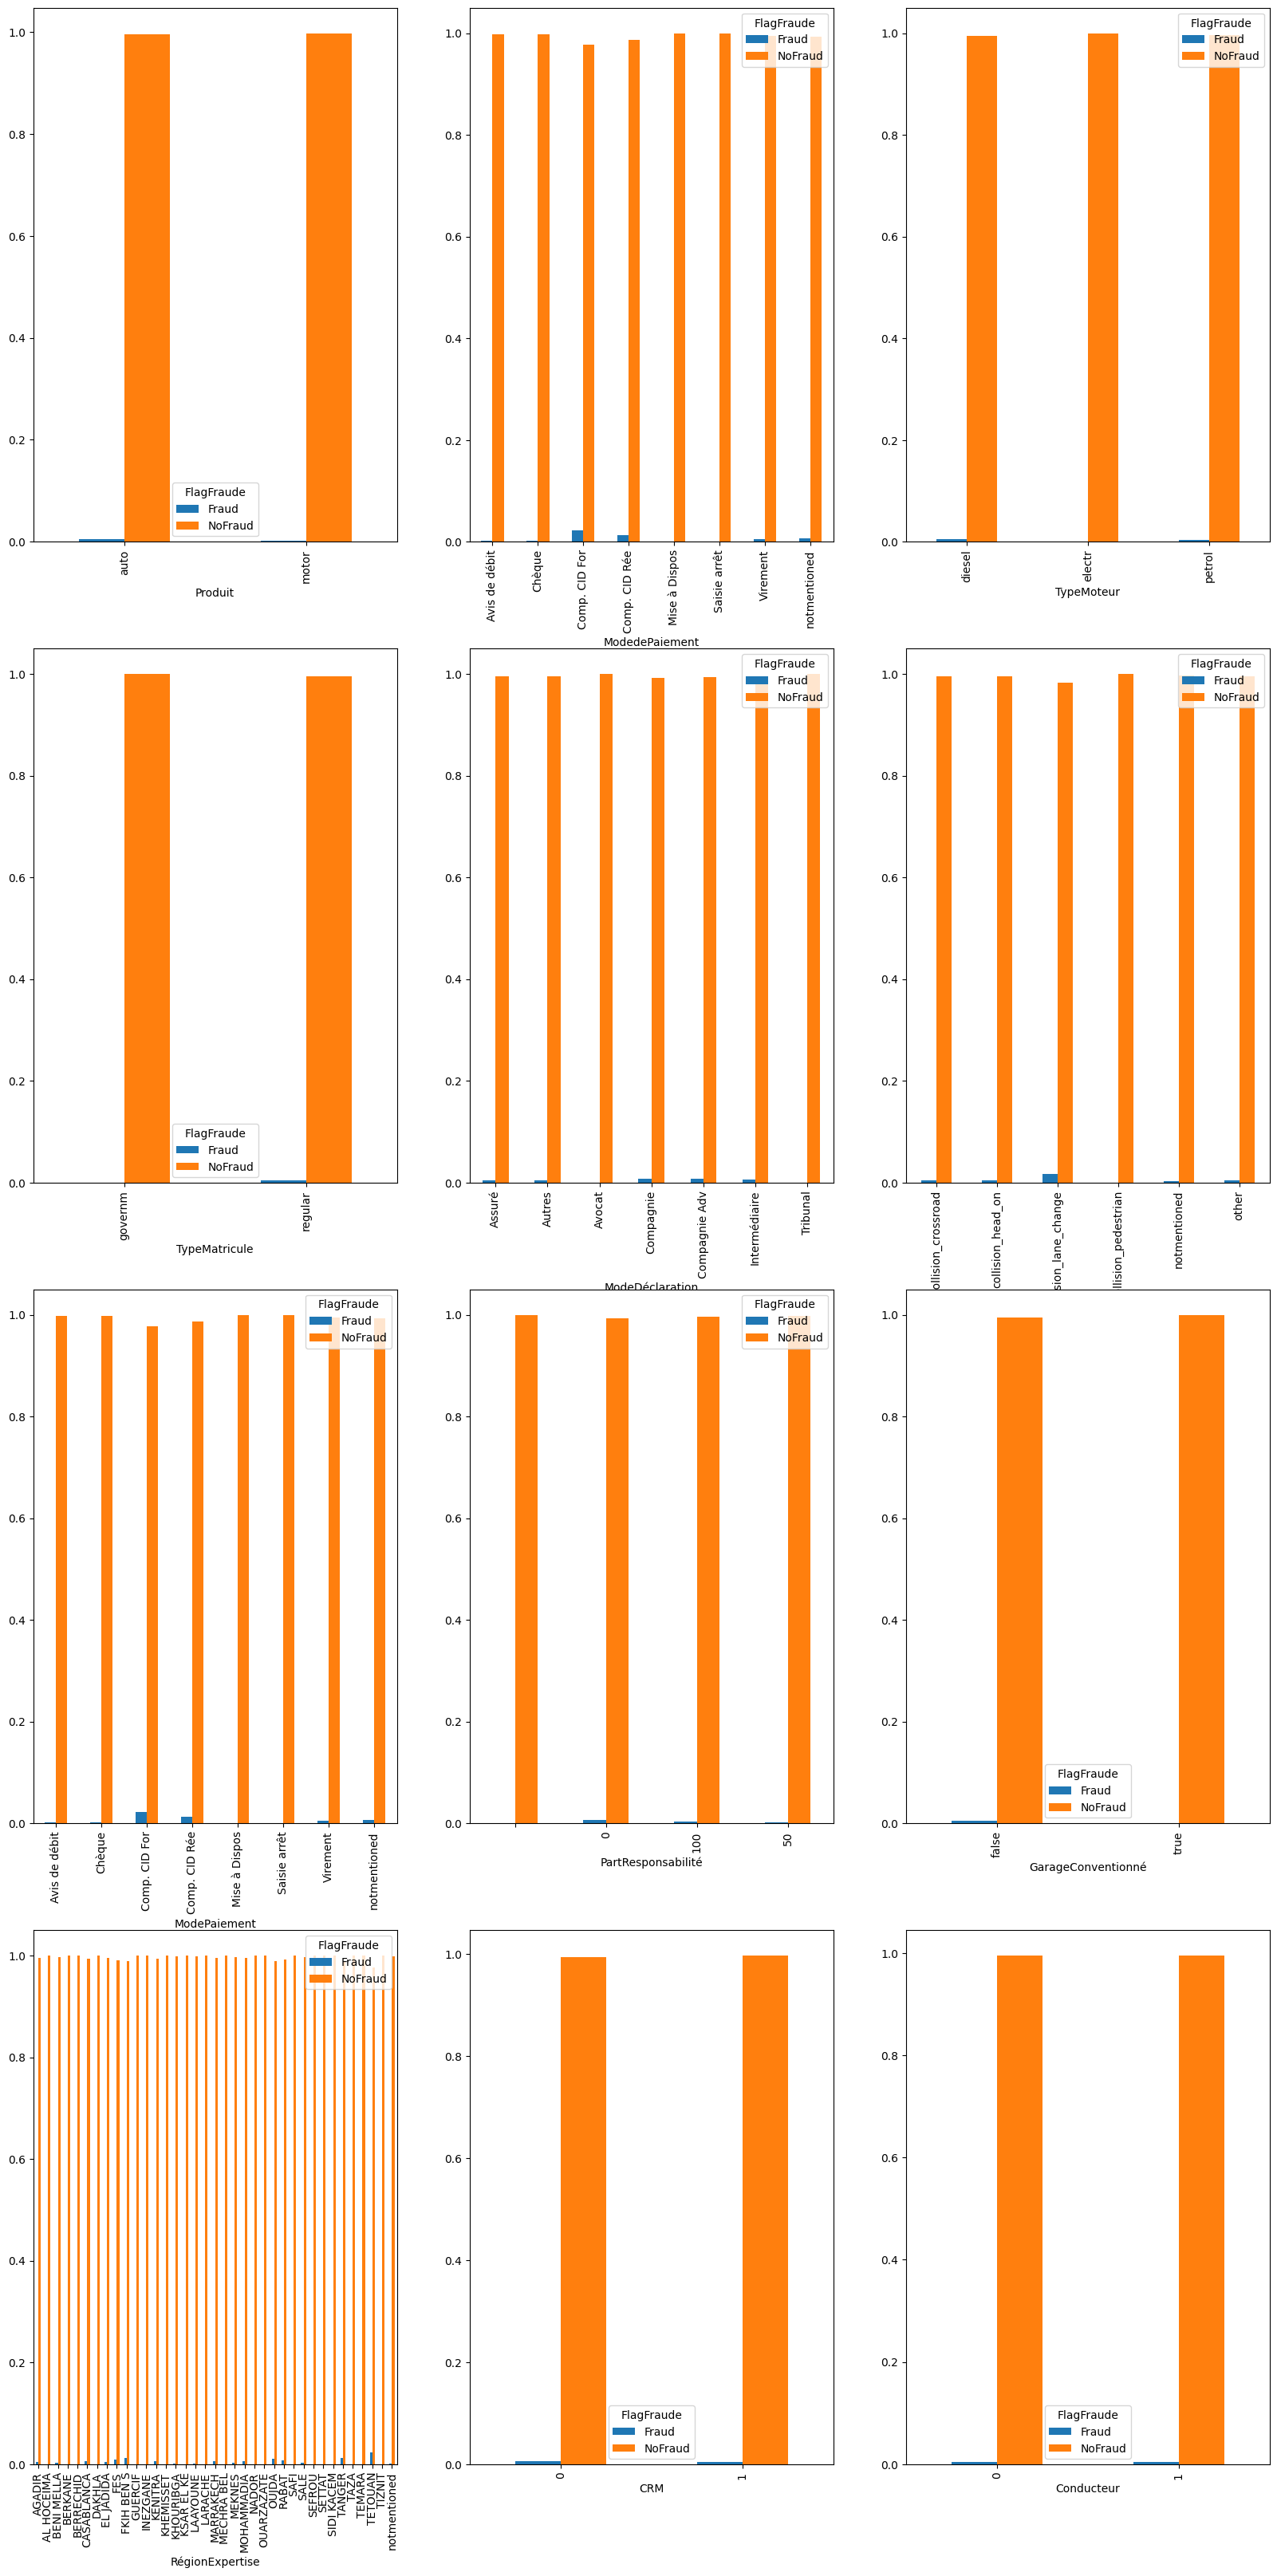

In [86]:
i=0
fig,axes=plt.subplots(4,3,figsize=(20,40))
for col in selected_data.columns:
    if col != 'FlagFraude':
        pd.crosstab(selected_data[col],selected_data['FlagFraude'],normalize='index').plot(kind='bar',ax=axes.flat[i])
        i+=1

Resultat:
* Les personnes possédant une auto sont plus susceptibles de frauder que celles possédant un motocycle.
* le taux de fraude est plus grand chez les personnes payant par comp.cid for et comp.cid ree
* Les voitures appartenant au gouvernement ne sont pas susceptibles d'aucune fraude.
* Le taux de fraude est élevé chez les causes de dommages collision changement de voie.
* les personnes non responsables  au sinistre sont plus susceptibles de frauder que si la responsabilité est partagée
* Le taux de fraude est élevé dans le cas où l'on se sert d'un garage non conventionné.
* Les personnes habitant dans les régions suivantes, comme Fes,Fkih ben s ,Tetouane,Tanger et Ouajda, sont plus susceptibles de commettre des fraudes que dans d'autres régions.


In [87]:
df_num = df.select_dtypes('number')

In [88]:
#General statistics
df_num.describe()

,IDENSIN,Puissance,nbreVéhicule,NbreAdverssaires,MontantRèglement,A&AP,Acc. Amén,Appareils électrique,Ass. Complémentaire,B.Eff.Pers.,...,R,RC,RV,Rabais Covid 19,TC,V,V.Neuf,VL,VP,VR
count,1.852800e+05,185280.000000,185280.000000,185280.00000,1.852800e+05,185280.000000,185280.000000,185280.000000,185280.000000,185280.000000,...,185280.000000,185280.000000,185280.000000,185280.000000,185280.000000,185280.000000,185280.000000,185280.000000,185280.000000,185280.000000
mean,1.006070e+07,8.548586,1.641505,0.65503,4.941672e+03,0.000097,0.000103,0.000011,0.043043,0.000151,...,0.000065,0.990485,0.014670,0.072614,0.289869,0.000011,0.001096,0.557761,0.001317,0.027461
std,1.165442e+06,8.706172,0.497578,0.49531,1.174114e+04,0.009856,0.010126,0.003285,0.202954,0.012292,...,0.008048,0.097082,0.120227,0.259503,0.453703,0.003285,0.033082,0.496654,0.036266,0.163423
min,8.004143e+06,0.000000,0.000000,0.00000,-1.360000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.560239e+06,6.000000,1.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.882394e+06,6.000000,2.000000,1.00000,2.140000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.078303e+07,8.000000,2.000000,1.00000,4.630000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.557106e+07,828.000000,17.000000,17.00000,1.108407e+06,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:

selected_columns = ['nbreVéhicule','NbreAdverssaires','Puissance','FlagFraude']

# Use the 'loc' method to select only the specified columns with data types 'int' and 'str'
selected_data = df.loc[:, selected_columns]

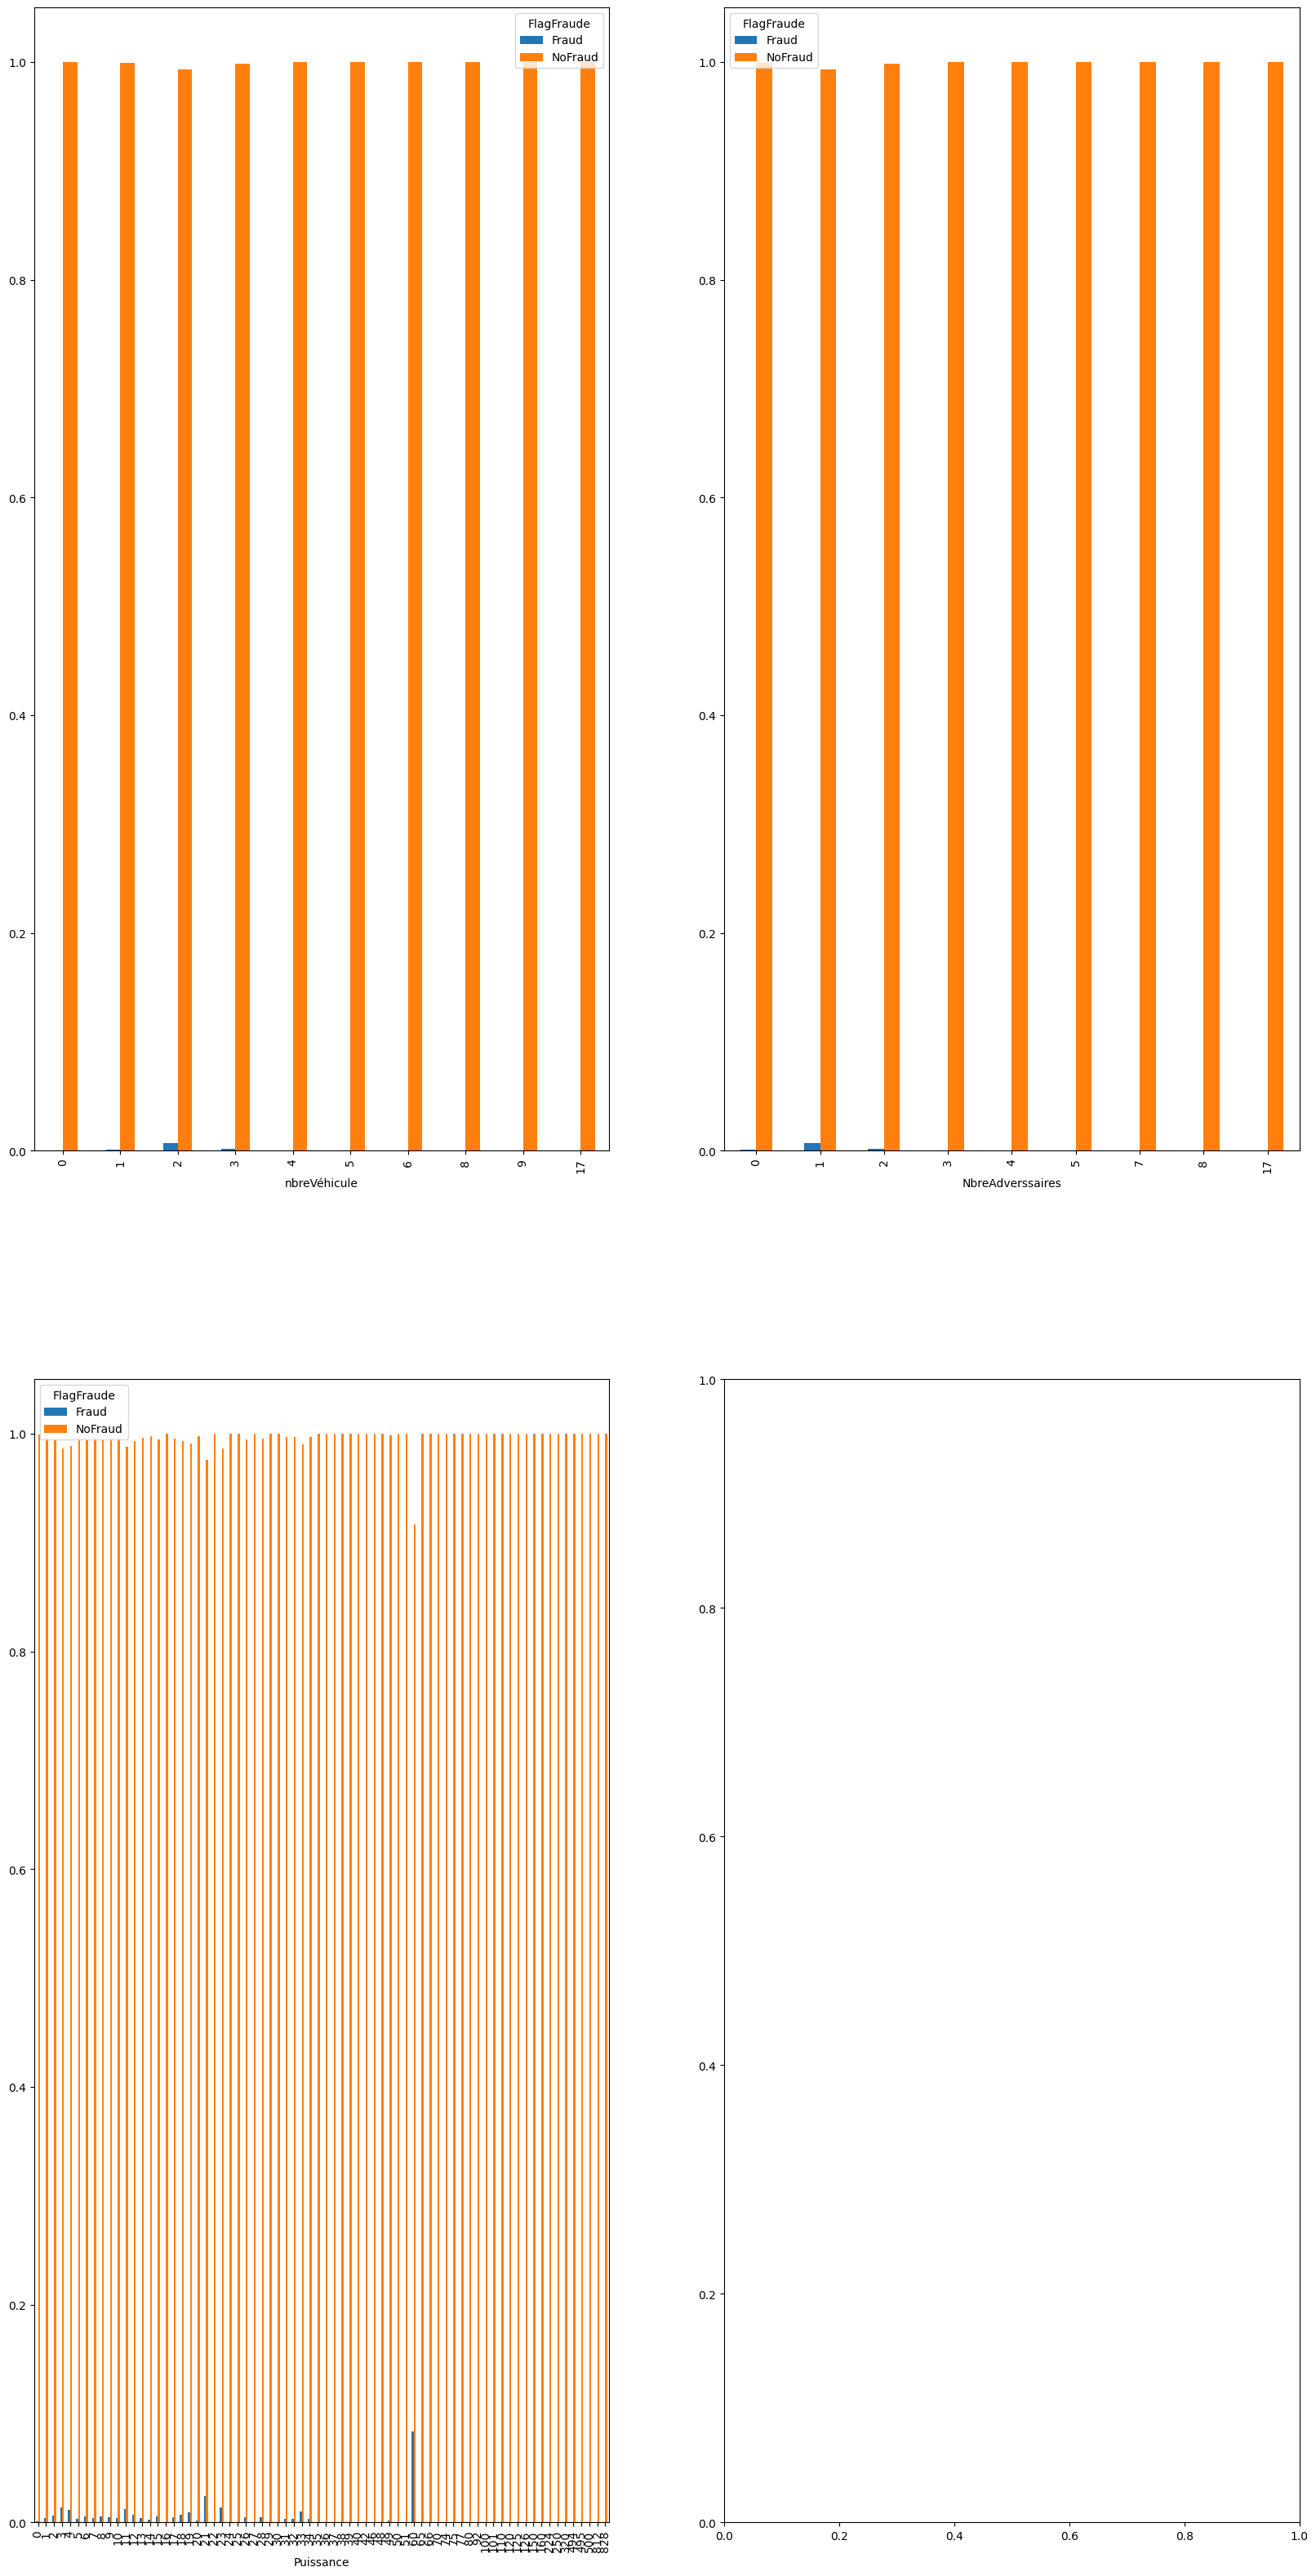

In [90]:
i=0
fig,axes=plt.subplots(2,2,figsize=(20,40))
for col in selected_data.columns:
    if col != 'FlagFraude':
        pd.crosstab(selected_data[col],selected_data['FlagFraude'],normalize='index').plot(kind='bar',ax=axes.flat[i])
        i+=1

Résultat:
* Les sinistres qui concernent 2 véhicules et où les nombres d'adversaires est 2 sont plus susceptibles d'être frauduleux
* les sinistres dont la puissance de produits est égale à 21 ou 60 sont plus susceptibles d'être frauduleux

In [91]:

selected_columns =['A&AP','FlagFraude', 'Acc. Amén', 'Appareils électrique', 'Ass. Complémentaire', 'B.Eff.Pers.', 'BG', 'BM', 'BN', 'CRM', 'Con', 'Condu', 'Conducteur', 'DC', 'DR', 'E', 'Ecos Bonus', 'Eq.AUDIO', 'Ev', 'Eve', 'EveC', 'EveCa', 'EveCat', 'EveCat D', 'EveCat Do', 'EveCat Dom', 'EveCat R', 'EveCat RC', 'IC', 'Inond.', 'MA', 'PF', 'PM', 'Passager', 'Passagers', 'Pertes batteries', 'R', 'RC', 'RV', 'Rabais Covid 19', 'TC', 'V', 'V.Neuf', 'VL', 'VP', 'VR']


# Use the 'loc' method to select only the specified columns with data types 'int' and 'str'
selected_data = df.loc[:, selected_columns]
selected_data.shape

(185280, 46)

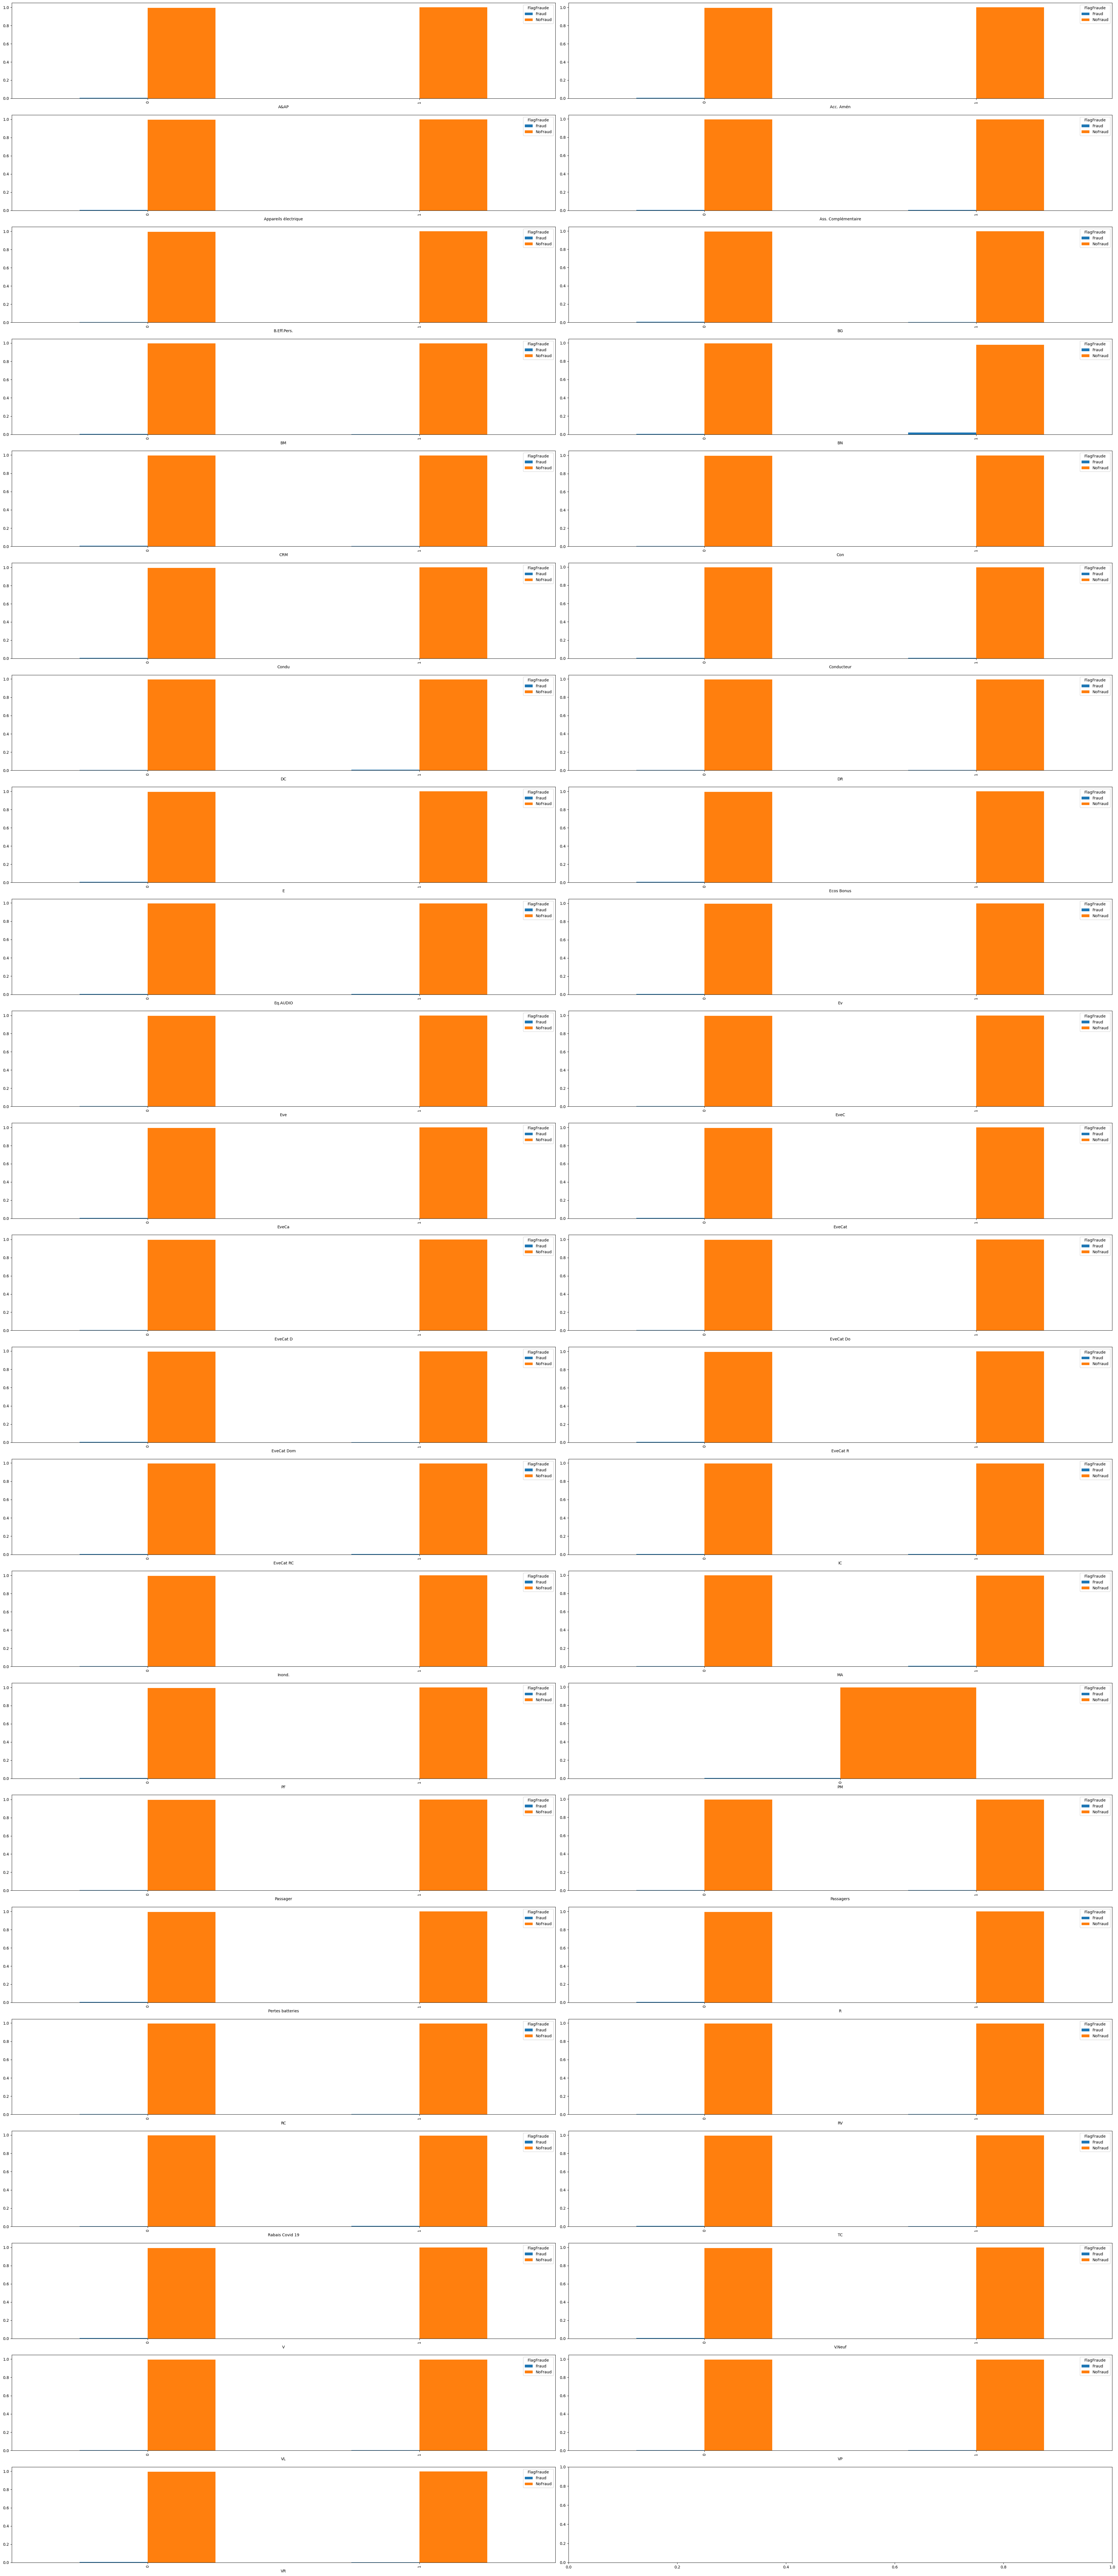

In [92]:
i = 0
num_rows = 23
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 4*num_rows))

for col in selected_data.columns:
    if col != 'FlagFraude':
        pd.crosstab(selected_data[col], selected_data['FlagFraude'], normalize='index').plot(kind='bar', ax=axes.flat[i])
        i += 1

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


* Les personnes ayant comme garantis BN sont plus susceptibles de frauder.

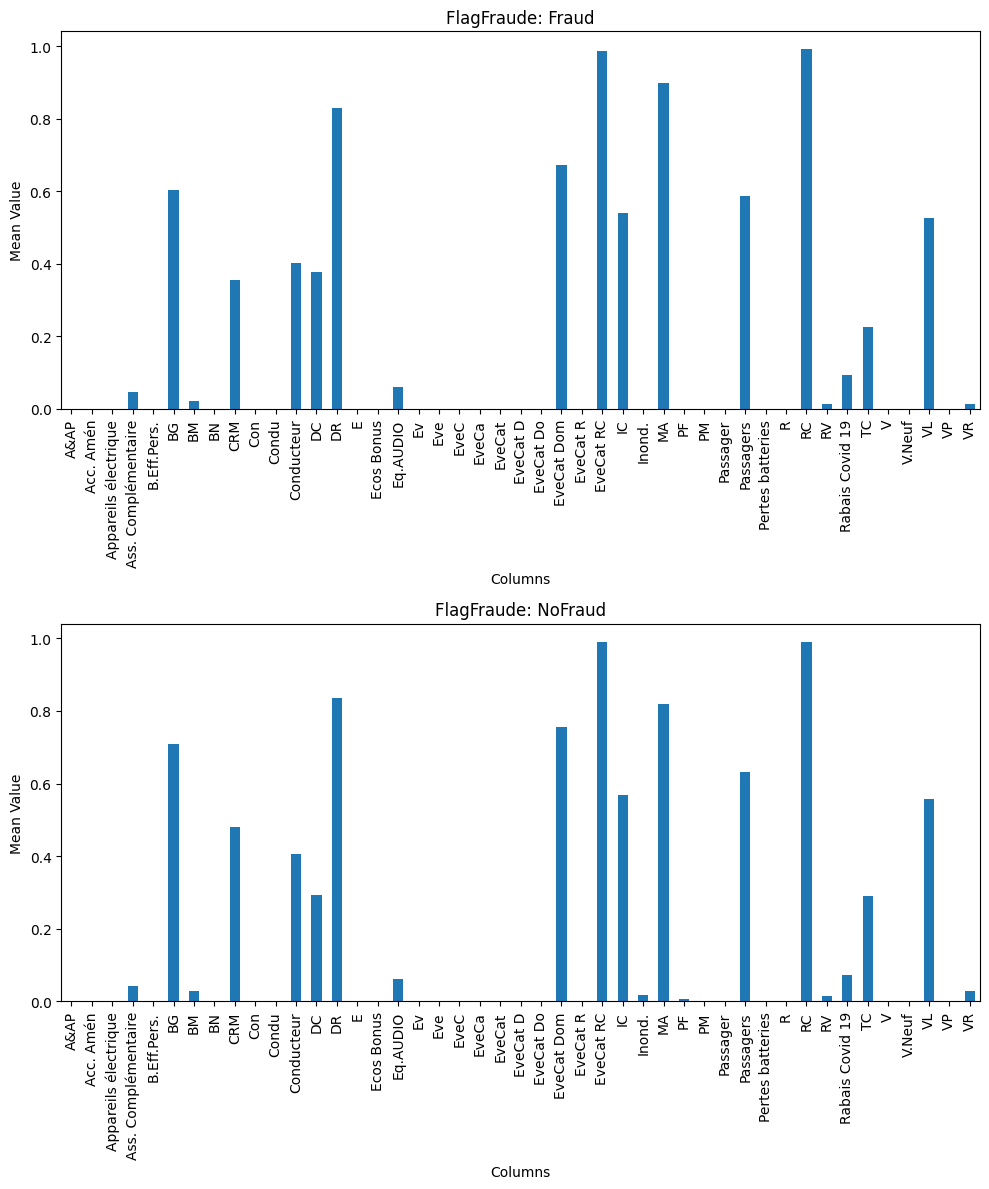

In [93]:
# Group the data by 'FlagFraude' and calculate the mean for each group
grouped_data = selected_data.groupby('FlagFraude').mean()

# Plot the grouped data as bar plots
fig, axes = plt.subplots(len(grouped_data), 1, figsize=(10, 6*len(grouped_data)))

for i, (flag, data) in enumerate(grouped_data.iterrows()):
    data.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'FlagFraude: {flag}')
    axes[i].set_xlabel('Columns')
    axes[i].set_ylabel('Mean Value')

plt.tight_layout()
plt.show()


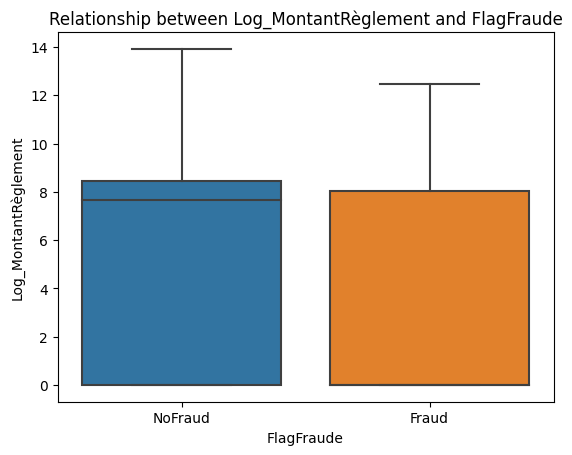

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['Log_MontantRèglement'] = df['MontantRèglement'].apply(lambda x: np.log1p(x))
sns.boxplot(x='FlagFraude', y='Log_MontantRèglement', data=df)
plt.xlabel('FlagFraude')
plt.ylabel('Log_MontantRèglement')
plt.title('Relationship between Log_MontantRèglement and FlagFraude')
plt.show()


#Date Processing

In [95]:
# Calculate the time difference between in days
df['TimeDifference'] = (df['DateDéclaration'] - df['DateSurv']).dt.days
df['TimeDiff_Date1èreMEC_DateMEC'] = (df['DateMEC'] - df['Date1èreMEC']).dt.days
df['TimeDiff_DateEffet_Date1èreMEC'] = (df['Date1èreMEC'] - df['DateEffet']).dt.days
df['TimeDiff_DateSurv_Date1èreMEC'] = (df['Date1èreMEC'] - df['DateSurv']).dt.days
df['TimeDiff_Echéance_Date1èreMEC'] = (df['Date1èreMEC'] - df['Echéance']).dt.days
df['TimeDiff_ProchainTerme_Date1èreMEC'] = (df['Date1èreMEC'] - df['ProchainTerme']).dt.days
df['TimeDiff_DateSurv_DateEffet'] = (df['DateEffet'] - df['DateSurv']).dt.days
df['TimeDiff_DateDéclaration_Date1èreMEC'] = (df['Date1èreMEC'] - df['DateDéclaration']).dt.days
# Drop the original datetime columns if not needed for the classification model
df.drop(columns=['DateMEC', 'Date1èreMEC', 'DateEffet', 'Echéance', 'ProchainTerme',
                 'DateSurv', 'DateDéclaration', 'HeureSurvenance', 'HeureDéclaration'], inplace=True)


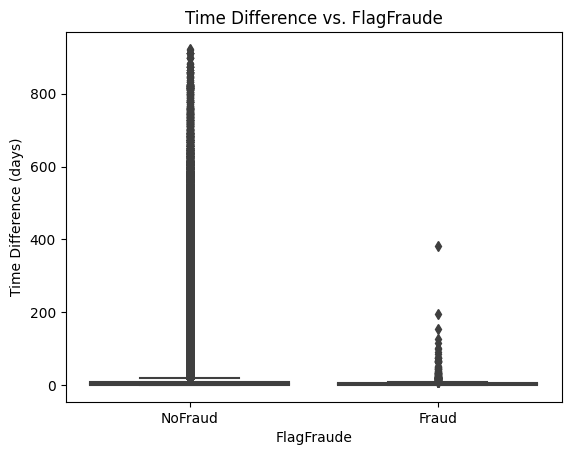

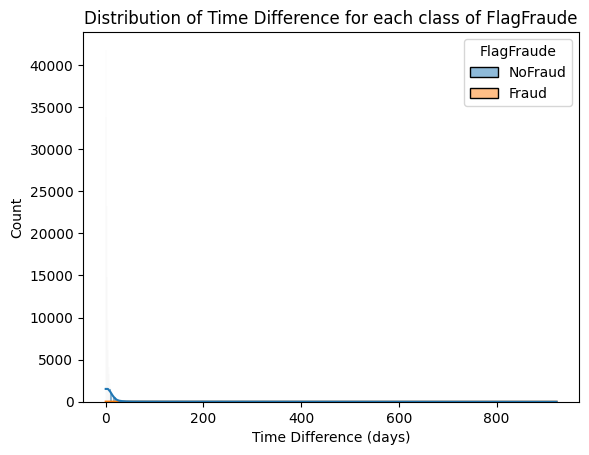

In [96]:
# EDA and Visualization
# Calculate the mean 'TimeDifference' for each class of 'FlagFraude'
mean_time_difference = df.groupby('FlagFraude')['TimeDifference'].mean()

# Create a box plot to visualize the distribution of 'TimeDifference' for each class of 'FlagFraude'
sns.boxplot(x='FlagFraude', y='TimeDifference', data=df)
plt.xlabel('FlagFraude')
plt.ylabel('Time Difference (days)')
plt.title('Time Difference vs. FlagFraude')
plt.show()
# Create a histogram to visualize the distribution of 'TimeDifference' for each class of 'FlagFraude'
sns.histplot(data=df, x='TimeDifference', hue='FlagFraude', kde=True)
plt.xlabel('Time Difference (days)')
plt.ylabel('Count')
plt.title('Distribution of Time Difference for each class of FlagFraude')
plt.show()


In [97]:
# --- Data Set splitting ---
X = df.drop(['FlagFraude','RégionExpertise','IDENSIN','NPolice','NSinistre','Matricule','Log_MontantRèglement'],axis=1)
y = df['FlagFraude']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=321)
X_train

,Produit,ModedePaiement,Marque,TypeMoteur,Puissance,TypeMatricule,ModeDéclaration,CausesDommage,ModePaiement,nbreVéhicule,...,VP,VR,TimeDifference,TimeDiff_Date1èreMEC_DateMEC,TimeDiff_DateEffet_Date1èreMEC,TimeDiff_DateSurv_Date1èreMEC,TimeDiff_Echéance_Date1èreMEC,TimeDiff_ProchainTerme_Date1èreMEC,TimeDiff_DateSurv_DateEffet,TimeDiff_DateDéclaration_Date1èreMEC
152738,auto,Avis de débit,RENAULT,diesel,8,regular,Assuré,other,Avis de débit,1,...,0,0,36,-344.0,-11511.0,-12654.0,-12972.0,NaN,-1143,-12691.0
2925,auto,notmentioned,PEUGEOT,diesel,6,regular,Intermédiaire,collision_lane_change,notmentioned,2,...,0,0,2,-114.0,844.0,828.0,479.0,NaN,-16,825.0
23020,auto,notmentioned,AUDI,diesel,8,regular,Assuré,other,notmentioned,2,...,0,0,2,-337.0,-2864.0,-3054.0,-3229.0,NaN,-190,-3057.0
51026,auto,notmentioned,RENAULT,diesel,6,regular,Intermédiaire,collision_crossroad,notmentioned,2,...,0,0,64,-273.0,-457.0,-974.0,-1188.0,-1188.0,-517,-1038.0
15682,motor,notmentioned,BECANE,petrol,0,regular,Intermédiaire,other,notmentioned,2,...,0,0,0,-108.0,0.0,-333.0,-365.0,NaN,-333,-334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44926,auto,notmentioned,AUDI,diesel,8,regular,Assuré,other,notmentioned,2,...,0,0,2,-101.0,868.0,-85.0,-228.0,NaN,-953,-88.0
92456,auto,notmentioned,CITROEN,petrol,6,regular,Assuré,other,notmentioned,2,...,0,0,3,-351.0,-4543.0,-4776.0,-4819.0,NaN,-233,-4780.0
74003,auto,notmentioned,CHEVROLET,petrol,7,regular,Assuré,other,notmentioned,2,...,0,0,2,-23.0,-4909.0,-5396.0,-5459.0,NaN,-487,-5398.0
136163,auto,Avis de débit,FIAT,diesel,6,regular,Assuré,other,Avis de débit,2,...,0,0,1,-237.0,-3900.0,-3967.0,-4084.0,NaN,-67,-3969.0


# LABEL ENCODER

In [98]:
#--- Standardizing numeric columns ---
num_col = X_train.select_dtypes('number').drop(['A&AP', 'Acc. Amén', 'Appareils électrique', 'Ass. Complémentaire', 'B.Eff.Pers.', 'BG', 'BM', 'BN', 'CRM', 'Con', 'Condu', 'Conducteur', 'DC', 'DR', 'E', 'Ecos Bonus', 'Eq.AUDIO', 'Ev', 'Eve', 'EveC', 'EveCa', 'EveCat', 'EveCat D', 'EveCat Do', 'EveCat Dom', 'EveCat R', 'EveCat RC', 'IC', 'Inond.', 'MA', 'PF', 'PM', 'Passager', 'Passagers', 'Pertes batteries', 'R', 'RC', 'RV', 'Rabais Covid 19', 'TC', 'V', 'V.Neuf', 'VL', 'VP', 'VR'],axis=1).columns
std_scaler = StandardScaler()
X_train[num_col] = std_scaler.fit_transform(X_train[num_col])
X_test[num_col] = std_scaler.transform(X_test[num_col])
num_col

Index(['Puissance', 'nbreVéhicule', 'NbreAdverssaires', 'MontantRèglement',
       'TimeDifference', 'TimeDiff_Date1èreMEC_DateMEC',
       'TimeDiff_DateEffet_Date1èreMEC', 'TimeDiff_DateSurv_Date1èreMEC',
       'TimeDiff_Echéance_Date1èreMEC', 'TimeDiff_ProchainTerme_Date1èreMEC',
       'TimeDiff_DateSurv_DateEffet', 'TimeDiff_DateDéclaration_Date1èreMEC'],
      dtype='object')

In [99]:
oh_col = X.select_dtypes('object').drop(['Marque'],axis=1).columns #object columns to be one hot encoded
oh_col

Index(['Produit', 'ModedePaiement', 'TypeMoteur', 'TypeMatricule',
       'ModeDéclaration', 'CausesDommage', 'ModePaiement', 'Ville',
       'PartResponsabilité', 'GarageConventionné'],
      dtype='object')

In [100]:
#--- one hot encoding non ordinal features ---

# Assuming oh_col contains the names of the categorical columns you want to one-hot encode
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)  # Set handle_unknown='ignore' to ignore unknown categories
oh_encoder.fit(X_train[oh_col])

# Transform the training data using the fitted encoder
OH_encoded_train_features = oh_encoder.transform(X_train[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features, index=X_train[oh_col].index, columns=oh_encoder.get_feature_names_out(X_train[oh_col].columns))

# Transform the test data using the fitted encoder
OH_encoded_test_features = oh_encoder.transform(X_test[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features, index=X_test[oh_col].index, columns=oh_encoder.get_feature_names_out(X_test[oh_col].columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [101]:
X_train = pd.concat([X_train,OH_encoded_X_train],axis=1)
X_train = X_train.drop(X_train[oh_col],axis=1)
X_test = pd.concat([X_test,OH_encoded_X_test],axis=1)
X_test = X_test.drop(X_test[oh_col],axis=1)

In [102]:
X_train

,Marque,Puissance,nbreVéhicule,NbreAdverssaires,MontantRèglement,A&AP,Acc. Amén,Appareils électrique,Ass. Complémentaire,B.Eff.Pers.,...,Ville_ZAOUIA CHEIKH.,Ville_ZEGHANGHANE,Ville_ZHILIGA,Ville_ZIRARA,PartResponsabilité_,PartResponsabilité_0,PartResponsabilité_100,PartResponsabilité_50,GarageConventionné_false,GarageConventionné_true
152738,RENAULT,-0.062556,-1.291255,-1.324284,-0.342098,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2925,PEUGEOT,-0.292740,0.718795,0.694773,0.098017,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23020,AUDI,-0.062556,0.718795,0.694773,0.463303,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51026,RENAULT,-0.292740,0.718795,0.694773,0.142897,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15682,BECANE,-0.983289,0.718795,0.694773,-0.260520,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44926,AUDI,-0.062556,0.718795,0.694773,0.085110,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
92456,CITROEN,-0.292740,0.718795,0.694773,0.399188,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
74003,CHEVROLET,-0.177648,0.718795,0.694773,0.653117,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
136163,FIAT,-0.292740,0.718795,0.694773,-0.165192,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [103]:
X_train.drop(['Marque','TimeDiff_ProchainTerme_Date1èreMEC'], axis=1, inplace=True)
X_test.drop(['Marque','TimeDiff_ProchainTerme_Date1èreMEC'], axis=1, inplace=True)


In [104]:
# Check for missing values in each column of X_train
missing_values_count = X_train.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]

# Display the count of missing values for each column with missing values
print(columns_with_missing_values)


TimeDiff_Date1èreMEC_DateMEC            979
TimeDiff_DateEffet_Date1èreMEC          979
TimeDiff_DateSurv_Date1èreMEC           979
TimeDiff_Echéance_Date1èreMEC           980
TimeDiff_DateDéclaration_Date1èreMEC    979
dtype: int64


In [105]:
from sklearn.impute import SimpleImputer

# Fill missing values in numerical columns with the median strategy
numerical_imputer = SimpleImputer(strategy='median')
numerical_columns = ['TimeDiff_Date1èreMEC_DateMEC', 'TimeDiff_DateEffet_Date1èreMEC',
                     'TimeDiff_DateSurv_Date1èreMEC', 'TimeDiff_Echéance_Date1èreMEC']
X_train[numerical_columns] = numerical_imputer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = numerical_imputer.transform(X_test[numerical_columns])

# For the 'TimeDiff_DateDéclaration_Date1èreMEC' column, you can use the mean strategy or any other appropriate method based on your data and business context
# For example:
date_declaration_imputer = SimpleImputer(strategy='mean')
X_train['TimeDiff_DateDéclaration_Date1èreMEC'] = date_declaration_imputer.fit_transform(X_train[['TimeDiff_DateDéclaration_Date1èreMEC']])
X_test['TimeDiff_DateDéclaration_Date1èreMEC'] = date_declaration_imputer.transform(X_test[['TimeDiff_DateDéclaration_Date1èreMEC']])


#Feature Selection

##Information Gain

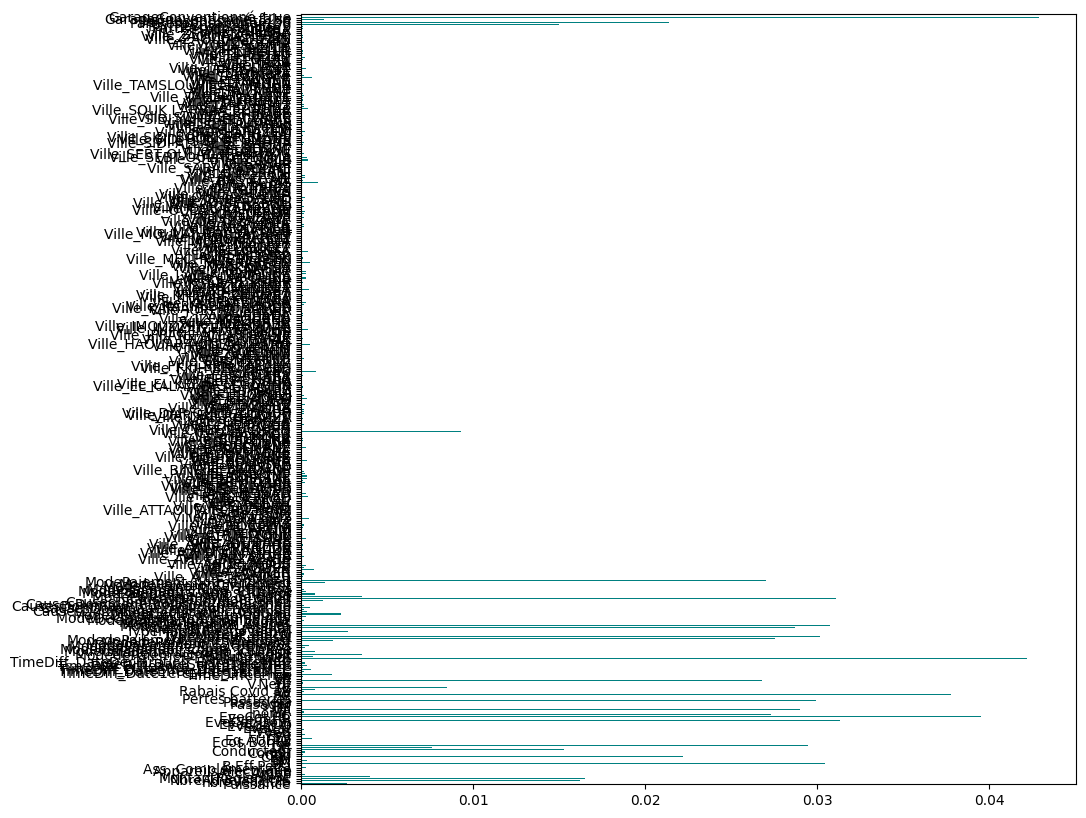

In [106]:
from sklearn.feature_selection import mutual_info_classif
# Calculate the mutual information scores
plt.figure(1, figsize=(10, 10))
mi_scores = mutual_info_classif(X_train, y_train)
importance=pd.Series(mi_scores,X_train.columns)
importance.plot(kind='barh',color='teal')
plt.show()

In [107]:
X.columns

Index(['Produit', 'ModedePaiement', 'Marque', 'TypeMoteur', 'Puissance',
       'TypeMatricule', 'ModeDéclaration', 'CausesDommage', 'ModePaiement',
       'nbreVéhicule', 'Ville', 'PartResponsabilité', 'NbreAdverssaires',
       'MontantRèglement', 'GarageConventionné', 'A&AP', 'Acc. Amén',
       'Appareils électrique', 'Ass. Complémentaire', 'B.Eff.Pers.', 'BG',
       'BM', 'BN', 'CRM', 'Con', 'Condu', 'Conducteur', 'DC', 'DR', 'E',
       'Ecos Bonus', 'Eq.AUDIO', 'Ev', 'Eve', 'EveC', 'EveCa', 'EveCat',
       'EveCat D', 'EveCat Do', 'EveCat Dom', 'EveCat R', 'EveCat RC', 'IC',
       'Inond.', 'MA', 'PF', 'PM', 'Passager', 'Passagers', 'Pertes batteries',
       'R', 'RC', 'RV', 'Rabais Covid 19', 'TC', 'V', 'V.Neuf', 'VL', 'VP',
       'VR', 'TimeDifference', 'TimeDiff_Date1èreMEC_DateMEC',
       'TimeDiff_DateEffet_Date1èreMEC', 'TimeDiff_DateSurv_Date1èreMEC',
       'TimeDiff_Echéance_Date1èreMEC', 'TimeDiff_ProchainTerme_Date1èreMEC',
       'TimeDiff_DateSurv_DateEffet', 

In [108]:
# Drop columns from X_train and X_test
columns_to_drop = ['VP', 'Ev', 'Eve', 'EveC', 'EveCa',
       'EveCat', 'EveCat D', 'EveCat Do','E','A&AP']
X.drop(columns=columns_to_drop, inplace=True)

# SMOT

In [109]:
# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Decision Tree classifier

In [110]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test,y_pred))

Accuracy: 0.9844559585492227
Precision: 0.9911217077191413
Recall: 0.9844559585492227
F1 Score: 0.9877088625486197
              precision    recall  f1-score   support

       Fraud       0.05      0.11      0.06       178
     NoFraud       1.00      0.99      0.99     36878

    accuracy                           0.98     37056
   macro avg       0.52      0.55      0.53     37056
weighted avg       0.99      0.98      0.99     37056



In [111]:
criterion = 'gini'
max_leaf_nodes = 24
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion=criterion,
                                    max_leaf_nodes=max_leaf_nodes)

# Fit the classifier to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test,y_pred))

Accuracy: 0.8695487910189983
Precision: 0.9936464646323496
Recall: 0.8695487910189983
F1 Score: 0.9257397264713224
              precision    recall  f1-score   support

       Fraud       0.03      0.70      0.05       178
     NoFraud       1.00      0.87      0.93     36878

    accuracy                           0.87     37056
   macro avg       0.51      0.78      0.49     37056
weighted avg       0.99      0.87      0.93     37056



## Logistic Regression

In [112]:
#--- Baseline score for Logistic Regression ---
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train_resampled,y_train_resampled)
y_pred = lgr.predict(X_test)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

       Fraud       0.01      0.54      0.02       178
     NoFraud       1.00      0.78      0.87     36878

    accuracy                           0.78     37056
   macro avg       0.50      0.66      0.45     37056
weighted avg       0.99      0.78      0.87     37056



In [113]:
# Specify non-default hyper-parameter values
C = 10.0
max_iter = 1000
# Train and test model
good_modelL = LogisticRegression(C = C, max_iter=max_iter) # create model
print(good_modelL) # display model parameters
good_modelL.fit(X_train_resampled,y_train_resampled) # train model
predL = good_modelL.predict(X_test) # predicted output for test examples
print("Classification report:")
print(classification_report(y_test, predL))

LogisticRegression(C=10.0, max_iter=1000)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Classification report:
              precision    recall  f1-score   support

       Fraud       0.01      0.54      0.02       178
     NoFraud       1.00      0.78      0.87     36878

    accuracy                           0.78     37056
   macro avg       0.50      0.66      0.45     37056
weighted avg       0.99      0.78      0.87     37056



## Naive Bayes classifier

In [114]:
# Create a Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.01      0.95      0.01       178
     NoFraud       1.00      0.16      0.28     36878

    accuracy                           0.17     37056
   macro avg       0.50      0.56      0.14     37056
weighted avg       0.99      0.17      0.28     37056



In [115]:
# Specify non-default hyper-parameter values
var_smoothing=  1e-07
# Train and test model
good_clf = GaussianNB(var_smoothing= 1e-07)# create model
print(good_clf) # display model parameters
good_clf.fit(X_train_resampled,y_train_resampled) # train model
predsvm = good_clf.predict(X_test) # predicted output for test examples
print("Classification report:")
print(classification_report(y_test, predsvm))

GaussianNB(var_smoothing=1e-07)
Classification report:
              precision    recall  f1-score   support

       Fraud       0.01      0.92      0.01       178
     NoFraud       1.00      0.20      0.33     36878

    accuracy                           0.20     37056
   macro avg       0.50      0.56      0.17     37056
weighted avg       0.99      0.20      0.33     37056



## KNN classifier

In [116]:
modelknn= KNeighborsClassifier().fit(X_train_resampled,y_train_resampled)
pred_testknn=modelknn.predict(X_test)
print("Classification report:")
print(classification_report(y_test, pred_testknn))

Classification report:
              precision    recall  f1-score   support

       Fraud       0.02      0.17      0.03       178
     NoFraud       1.00      0.95      0.97     36878

    accuracy                           0.95     37056
   macro avg       0.51      0.56      0.50     37056
weighted avg       0.99      0.95      0.97     37056



In [117]:
# Specify non-default hyper-parameter values
algorithm = 'brute'
metric = 'euclidean'
n_neighbors =  20
# Train and test model
good_modelknn = KNeighborsClassifier(algorithm=algorithm, metric=metric,
                                  n_neighbors=n_neighbors) # create model
print(good_modelknn) # display model parameters
good_modelknn.fit(X_train_resampled, y_train_resampled) # train model
predknn = good_modelknn.predict(X_test) # predicted output for test examples

print("Classification report:")
print(classification_report(y_test, predknn))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predknn)))


KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=20)
Classification report:
              precision    recall  f1-score   support

       Fraud       0.02      0.43      0.03       178
     NoFraud       1.00      0.88      0.93     36878

    accuracy                           0.87     37056
   macro avg       0.51      0.65      0.48     37056
weighted avg       0.99      0.87      0.93     37056

Confusion matrix (Rows actual, Columns predicted):
      0      1
0    77    101
1  4564  32314


## XGBoost

In [118]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBoost model with specified hyperparameters
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_encoded)

# Predict the target labels on the test data
predXGB = xgb_model.predict(X_test)

# Calculate evaluation metrics
accXGB = accuracy_score(y_test_encoded, predXGB)
precXGB = precision_score(y_test_encoded, predXGB)
recaXGB = recall_score(y_test_encoded, predXGB)

# Print the results
print("Results on test data")
print(f'Test accuracy = {accXGB:.4f}')
print(f'Test precision = {precXGB:.4f}')
print(f'Test recall = {recaXGB:.4f}')
print("Classification report:")
print(classification_report(y_test_encoded, predXGB, target_names=label_encoder.classes_))

Results on test data
Test accuracy = 0.9938
Test precision = 0.9954
Test recall = 0.9984
Classification report:
              precision    recall  f1-score   support

       Fraud       0.09      0.03      0.05       178
     NoFraud       1.00      1.00      1.00     36878

    accuracy                           0.99     37056
   macro avg       0.54      0.52      0.52     37056
weighted avg       0.99      0.99      0.99     37056



# Undersampling

In [119]:
# Combine X_train and X_test
X = pd.concat([X_train, X_test], ignore_index=True)

# Combine y_train and y_test
y = pd.concat([y_train, y_test], ignore_index=True)

In [120]:
y.value_counts()

NoFraud    184389
Fraud         891
Name: FlagFraude, dtype: int64

In [121]:
df = pd.concat([X, y], axis=1)

In [122]:
# Filter the samples for fraud and nofraud
fraud_cases = df[df['FlagFraude'] == 'Fraud']
nofraud_cases = df[df['FlagFraude'] == 'NoFraud'].sample(n=5000, random_state=42)

# Combine the selected fraud and nofraud cases
selected_cases = pd.concat([fraud_cases, nofraud_cases])
# Split back into X_train and y_train
X = selected_cases.drop('FlagFraude', axis=1)
y = selected_cases['FlagFraude']

# Print the value counts to verify the distribution
print(y.value_counts())

NoFraud    5000
Fraud       891
Name: FlagFraude, dtype: int64


In [123]:
# Split the data into training and test sets (80% for training, 20% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree classifier

In [124]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the resampled training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test,y_pred))


Accuracy: 0.8413910093299406
Precision: 0.8372560585366257
Recall: 0.8413910093299406
F1 Score: 0.8391917515520743
              precision    recall  f1-score   support

       Fraud       0.52      0.49      0.51       196
     NoFraud       0.90      0.91      0.91       983

    accuracy                           0.84      1179
   macro avg       0.71      0.70      0.71      1179
weighted avg       0.84      0.84      0.84      1179



In [125]:
tuned_parameters = [{ 'criterion': ['gini', 'entropy'],
        'max_leaf_nodes': range(5, 25),
        'max_features': [ 'sqrt', 'log2'],
        'min_impurity_decrease': [0.0, 0.1],
        'min_samples_leaf': [0.05],
        'min_weight_fraction_leaf': [0.0, 0.1],
        'splitter': ['best']}]# hyperparameters to tune

clf_D = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clf_D.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clf_D.best_params_) # best hyperparameter balues

print("\nGrid scores:")
means_D = clf_D.cv_results_['mean_test_score'] # mean accuracy with folds
stds_D = clf_D.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means_D, stds_D, clf_D.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits

Best parameters found:
{'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.05, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}

Grid scores:
0.853 (+/-0.000) for {'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.05, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
0.853 (+/-0.000) for {'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.05, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.853 (+/-0.000) for {'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 0.05, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
0.853 (+/-0.000) for {'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.1, 'min_samp

In [126]:
criterion ='entropy'
max_leaf_nodes =18
max_features='sqrt'
min_impurity_decrease= 0.0
min_samples_leaf= 0.05
min_weight_fraction_leaf= 0.0
splitter='best'
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion=criterion,
                                    max_leaf_nodes=max_leaf_nodes)

# Fit the classifier to the resampled training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test,y_pred))

Accuracy: 0.8778625954198473
Precision: 0.8696046900922547
Recall: 0.8778625954198473
F1 Score: 0.8721406910427634
              precision    recall  f1-score   support

       Fraud       0.67      0.53      0.59       196
     NoFraud       0.91      0.95      0.93       983

    accuracy                           0.88      1179
   macro avg       0.79      0.74      0.76      1179
weighted avg       0.87      0.88      0.87      1179



##Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
#--- Baseline score for Logistic Regression ---
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.65      0.13      0.22       196
     NoFraud       0.85      0.99      0.91       983

    accuracy                           0.84      1179
   macro avg       0.75      0.56      0.57      1179
weighted avg       0.82      0.84      0.80      1179



In [128]:
tuned_parameters = [{'C': [10.0, 100.0, 1000.0, 10000.0],
                     'max_iter': [500, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500]}] # hyperparameters to tune


clfL = GridSearchCV(LogisticRegression(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfL.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfL.best_params_) # best hyperparameter values

print("\nGrid scores:")
meansL = clfL.cv_results_['mean_test_score'] # mean accuracy with folds
stdsL = clfL.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansL, stdsL, clfL.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters found:
{'C': 10.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}

Grid scores:
0.853 (+/-0.012) for {'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.853 (+/-0.009) for {'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.855 (+/-0.011) for {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.853 (+/-0.008) for {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.853 (+/-0.012) for {'C': 10.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
0.855 (+/-0.009) for {'C': 10.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
0.855 (+/-0.011) for {'C': 10.0, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
0.855 (+/-0.009) for {'C': 10.0, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
0.853 (+/-0.011) for {'C': 10.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
0.855 (+/-0.007) for {'C': 10.0, 'max_iter': 5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [129]:
# Specify non-default hyper-parameter values
C = 10.0
max_iter = 500
penalty='l1'
solver= 'saga'
# Train and test model
good_modelL = LogisticRegression(C = C, max_iter=max_iter) # create model
print(good_modelL) # display model parameters
good_modelL.fit(X_train,y_train) # train model
predL = good_modelL.predict(X_test) # predicted output for test examples
print("Classification report:")
print(classification_report(y_test, predL))

LogisticRegression(C=10.0, max_iter=500)
Classification report:
              precision    recall  f1-score   support

       Fraud       0.60      0.15      0.24       196
     NoFraud       0.85      0.98      0.91       983

    accuracy                           0.84      1179
   macro avg       0.73      0.57      0.58      1179
weighted avg       0.81      0.84      0.80      1179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Naive Bayes classifier

In [130]:
# Create a Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.18      0.95      0.30       196
     NoFraud       0.94      0.15      0.25       983

    accuracy                           0.28      1179
   macro avg       0.56      0.55      0.28      1179
weighted avg       0.81      0.28      0.26      1179



In [131]:
tuned_parameters = [{'var_smoothing': [1e-9, 1e-8, 1e-7]}]
                     # hyperparameters to tune

clfsvm = GridSearchCV(clf, tuned_parameters,
                   cv=5) # grid search model
clfsvm.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfsvm.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansvm = clfsvm.cv_results_['mean_test_score'] # mean accuracy with folds
stdsvm = clfsvm.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansvm, stdsvm, clfsvm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))


Best parameters found:
{'var_smoothing': 1e-07}

Grid scores:
0.263 (+/-0.033) for {'var_smoothing': 1e-09}
0.272 (+/-0.022) for {'var_smoothing': 1e-08}
0.277 (+/-0.023) for {'var_smoothing': 1e-07}


In [132]:
# Specify non-default hyper-parameter values
var_smoothing= 1e-07
# Train and test model
good_clf = GaussianNB(var_smoothing= 1e-07)# create model
print(good_clf) # display model parameters
good_clf.fit(X_train,y_train) # train model
predsvm = good_clf.predict(X_test) # predicted output for test examples
print("Classification report:")
print(classification_report(y_test, predsvm))

GaussianNB(var_smoothing=1e-07)
Classification report:
              precision    recall  f1-score   support

       Fraud       0.19      0.95      0.31       196
     NoFraud       0.94      0.17      0.28       983

    accuracy                           0.30      1179
   macro avg       0.56      0.56      0.30      1179
weighted avg       0.82      0.30      0.29      1179



## KNN classifier

In [133]:
modelknn= KNeighborsClassifier().fit(X_train,y_train)
pred_trainknn = modelknn.predict(X_train)
pred_testknn=modelknn.predict(X_test)
print("Classification report:")
print(classification_report(y_test, pred_testknn))

Classification report:
              precision    recall  f1-score   support

       Fraud       0.59      0.24      0.35       196
     NoFraud       0.87      0.97      0.91       983

    accuracy                           0.85      1179
   macro avg       0.73      0.61      0.63      1179
weighted avg       0.82      0.85      0.82      1179



In [134]:
tuned_parameters = [{'algorithm':['brute'],
                     'metric': ['euclidean', 'minkowski'],
                    'n_neighbors': [5, 10, 20]}] # hyperparameters to tune

clfknn = GridSearchCV(KNeighborsClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfknn.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfknn.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansknn = clfknn.cv_results_['mean_test_score'] # mean accuracy with folds
stdsknn = clfknn.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansknn, stdsknn, clfknn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters found:
{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}

Grid scores:
0.841 (+/-0.012) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5}
0.844 (+/-0.010) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 10}
0.853 (+/-0.012) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}
0.841 (+/-0.012) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5}
0.844 (+/-0.010) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 10}
0.853 (+/-0.012) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 20}


In [135]:
# Specify non-default hyper-parameter values
algorithm = 'brute'
metric = 'euclidean'
n_neighbors =  20
# Train and test model
good_modelknn = KNeighborsClassifier(algorithm=algorithm, metric=metric,
                                  n_neighbors=n_neighbors) # create model
print(good_modelknn) # display model parameters
good_modelknn.fit(X_train, y_train) # train model
predknn = good_modelknn.predict(X_test) # predicted output for test examples
print("Classification report:")
print(classification_report(y_test, predknn))

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=20)
Classification report:
              precision    recall  f1-score   support

       Fraud       0.59      0.12      0.20       196
     NoFraud       0.85      0.98      0.91       983

    accuracy                           0.84      1179
   macro avg       0.72      0.55      0.56      1179
weighted avg       0.81      0.84      0.79      1179



 ## XGBoost

In [136]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBoost model with specified hyperparameters
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_train, y_train_encoded)

# Predict the target labels on the test data
predXGB = xgb_model.predict(X_test)

# Calculate evaluation metrics
accXGB = accuracy_score(y_test_encoded, predXGB)
precXGB = precision_score(y_test_encoded, predXGB)
recaXGB = recall_score(y_test_encoded, predXGB)

# Print the results
print("Results on test data")
print(f'Test accuracy = {accXGB:.4f}')
print(f'Test precision = {precXGB:.4f}')
print(f'Test recall = {recaXGB:.4f}')
print("Classification report:")
print(classification_report(y_test_encoded, predXGB, target_names=label_encoder.classes_))


Results on test data
Test accuracy = 0.8914
Test precision = 0.9075
Test recall = 0.9685
Classification report:
              precision    recall  f1-score   support

       Fraud       0.76      0.51      0.61       196
     NoFraud       0.91      0.97      0.94       983

    accuracy                           0.89      1179
   macro avg       0.83      0.74      0.77      1179
weighted avg       0.88      0.89      0.88      1179



In [137]:
tuned_parameters = [
    {
        'criterion': ['friedman_mse', 'mse', 'mae'],
        'learning_rate': [0.01, 0.1, 0.2],
        'loss': ['deviance', 'exponential'],
        'min_samples_leaf': [1, 2, 5],
        'n_estimators': [50, 100, 200]
    }
]
                     # hyperparameters to tune

clfsvm = GridSearchCV(xgb_model, tuned_parameters,
                 verbose=1, n_jobs=-1) # grid search model
clfsvm.fit(X_train, y_train_encoded) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfsvm.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansvm = clfsvm.cv_results_['mean_test_score'] # mean accuracy with folds
stdsvm = clfsvm.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansvm, stdsvm, clfsvm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[10:23:08] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "loss", "min_samples_leaf" } are not used.


Best parameters found:
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 1, 'n_estimators': 50}

Grid scores:
0.885 (+/-0.021) for {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'min_samples_leaf': 1, 'n_estimators': 50}
0.886 (+/-0.020) for {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'min_samples_leaf': 1, 'n_estimators': 100}
0.889 (+/-0.016) for {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'min_samples_leaf': 1, 'n_estimators': 200}
0.885 (+/-0.021) for {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'min_samples_leaf': 2, 'n_estimators': 50}
0.886 (+/-0.020) for {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'min_samples_leaf': 2, 'n

In [138]:
# Create the XGBoost model with specified hyperparameters
xgb_model = xgb.XGBClassifier(criterion='friedman_mse', learning_rate= 0.1, loss= 'deviance', min_samples_leaf=1, n_estimators= 50)

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_train, y_train_encoded)

# Predict the target labels on the test data
predXGB = xgb_model.predict(X_test)

# Calculate evaluation metrics
accXGB = accuracy_score(y_test_encoded, predXGB)
precXGB = precision_score(y_test_encoded, predXGB)
recaXGB = recall_score(y_test_encoded, predXGB)

# Print the results
print("Results on test data")
print(f'Test accuracy = {accXGB:.4f}')
print(f'Test precision = {precXGB:.4f}')
print(f'Test recall = {recaXGB:.4f}')
print("Classification report:")
print(classification_report(y_test_encoded, predXGB, target_names=label_encoder.classes_))


[10:23:12] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "loss", "min_samples_leaf" } are not used.

Results on test data
Test accuracy = 0.8965
Test precision = 0.9073
Test recall = 0.9756
Classification report:
              precision    recall  f1-score   support

       Fraud       0.80      0.50      0.62       196
     NoFraud       0.91      0.98      0.94       983

    accuracy                           0.90      1179
   macro avg       0.86      0.74      0.78      1179
weighted avg       0.89      0.90      0.89      1179

